Import all packages that is needed.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.offline as pyo
from scipy.signal import savgol_filter

In [109]:
import seaborn as sns

In [110]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

In [111]:
from sklearn.linear_model import LinearRegression       
from sklearn.linear_model import Ridge                  
from sklearn.linear_model import Lasso                  

In [112]:
from sklearn.model_selection import train_test_split    
from sklearn.model_selection import cross_val_score     
from sklearn.model_selection import GridSearchCV        

In [113]:
from sklearn.preprocessing import PolynomialFeatures    
from sklearn.preprocessing import StandardScaler        

In [114]:
from sklearn.pipeline import Pipeline                   

In [115]:
from sklearn.decomposition import PCA                   # Import the PCA tool

In [116]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [117]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [118]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.expected_conditions import *
import time

In [119]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [120]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

In [123]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [124]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

Read the dataset.

In [16]:
spotify = pd.read_csv('data with top_1000_artists.csv')

# explanatory modeling

## Data visulazation

In [17]:
data_visu = spotify.copy()
print(data_visu.columns) 
data_visu

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'top_1000_artist'],
      dtype='object')


track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32828  7bxnKAamR3snQ1VGLuVfC1   
32829  5Aevni09Em4575077nkWHz   
32830  7ImMqPP3Q1yfUHvsdn7wEo   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
32832  29zWqhca3zt5NsckZqDf6c   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32828               City Of Lights - Official Radio Edit      Lush & Simon   
32829                Closer - Sultan & Ned Shepard Remix    Tegan and Sara   
32830                       Sweet Surrender - Radio Edit       Starkillers   
32831                     Only For You - Maor Levi Remix            Mat Zo   
32832                             Typhoon - Original Mix      Julian Calor   

       track_popularity          track_album_id  \
0                    66  2oCs0DGTsRO98Gh5ZSl2Cx   
1                    67  63rPSO264uRjW1X5E6cWv6   
2                    70  1HoSmj2eLcsrR0vE9gThr4   
3                    60  1nqYsOef1yKKuGOVchbsk6   
4                    69  7m7vv9wlQ4i0LFuJiE2zsQ   
...                 ...                     ...   
32828                42  2azRoBBWEEEYhqV6sb7JrT   
32829                20  6kD6KLxj7s8eCE3ABvAyf5   
32830                14  0ltWNSY9JgxoIZO4VzuCa6   
32831                15  1fGrOkHnHJcStl14zNx8Jy   
32832                27  0X3mUOm6MhxR7PzxG95rAo   

                                        track_album_name  \
0      I Don't Care (with Justin Bieber) [Loud Luxury...   
1                        Memories (Dillon Francis Remix)   
2                        All the Time (Don Diablo Remix)   
3                            Call You Mine - The Remixes   
4                Someone You Loved (Future Humans Remix)   
...                                                  ...   
32828                         City Of Lights (Vocal Mix)   
32829                                     Closer Remixed   
32830                       Sweet Surrender (Radio Edit)   
32831                             Only For You (Remixes)   
32832                                      Typhoon/Storm   

      track_album_release_date    playlist_name             playlist_id  \
0                   2019-06-14        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
1                   2019-12-13        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
2                   2019-07-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
3                   2019-07-19        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
4                   2019-03-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
...                        ...              ...                     ...   
32828               2014-04-28  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32829               2013-03-08  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32830               2014-04-21  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32831               2014-01-01  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32832               2014-03-03  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   

      playlist_genre  ... loudness  mode  speechiness  acousticness  \
0                pop  ...   -2.634     1       0.0583      0.102000   
1                pop  ...   -4.969     1       0.0373      0.072400   
2                pop  ...   -3.432     0       0.0742      0.079400   
3                pop  ...   -3.778     1       0.1020      0.028700   
4                pop  ...   -4.672     1       0.0359      0.080300   
...              ...  ... 

we first drop the column "top 1000 artist" and creat a new "year" column to track the year of the song

In [18]:
data_visu['year']=data_visu['track_album_release_date'].str[:4].astype(int) 

draw a histogram to the distribution of each variable

Text(0.5, 1.0, 'Hisogram plot')

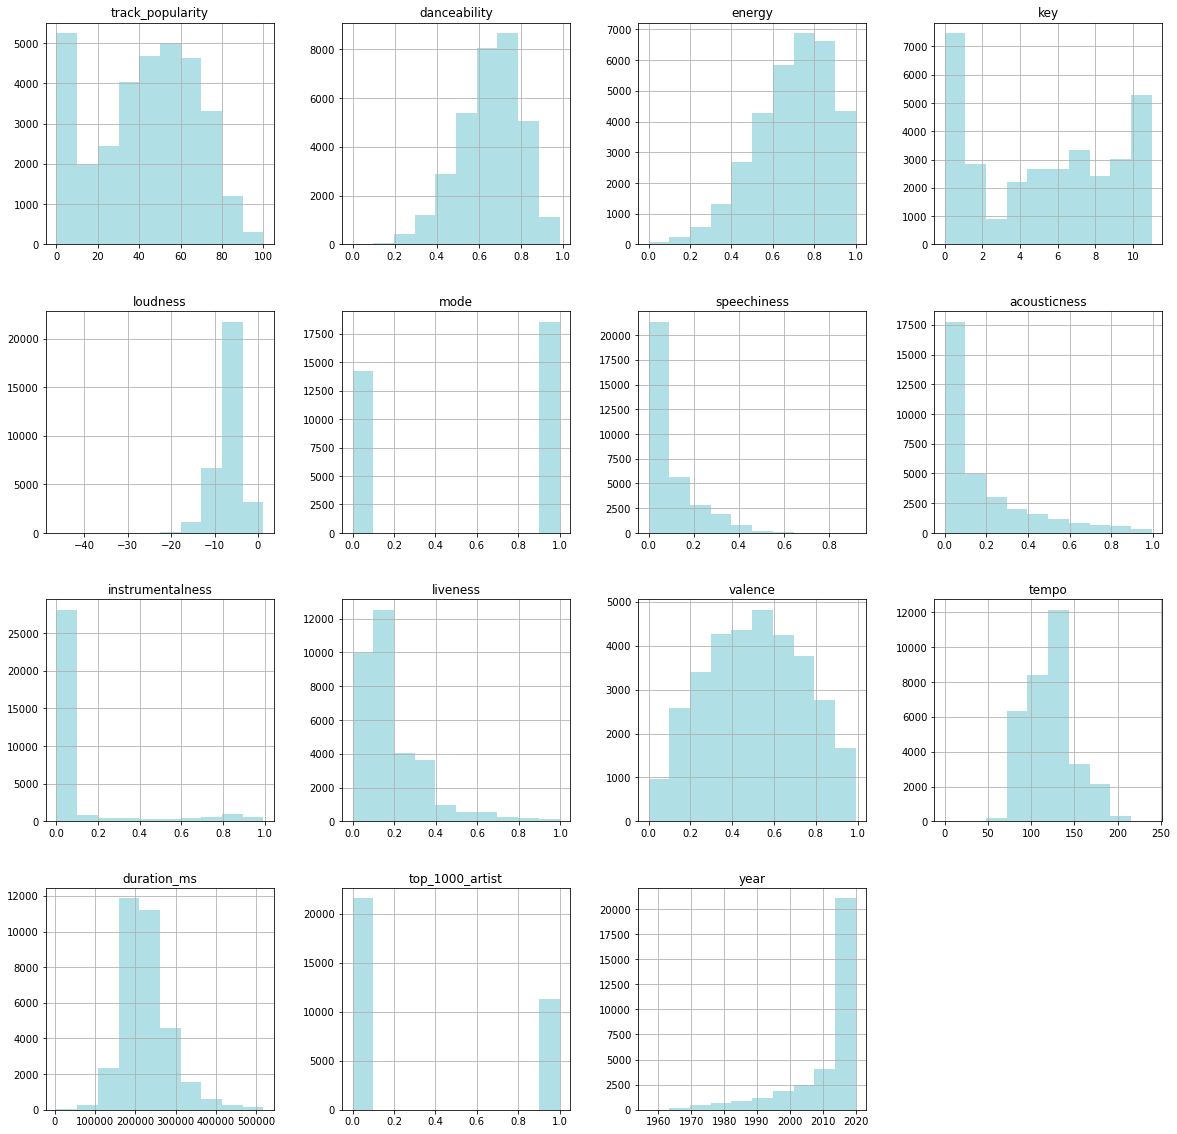

In [19]:
data_visu.hist(figsize=(20,20), color='PowderBlue')
plt.title("Hisogram plot", size=15, weight='bold')

then we plot a correlation matrix heatmap and a pairplot to see the relationship of each variables

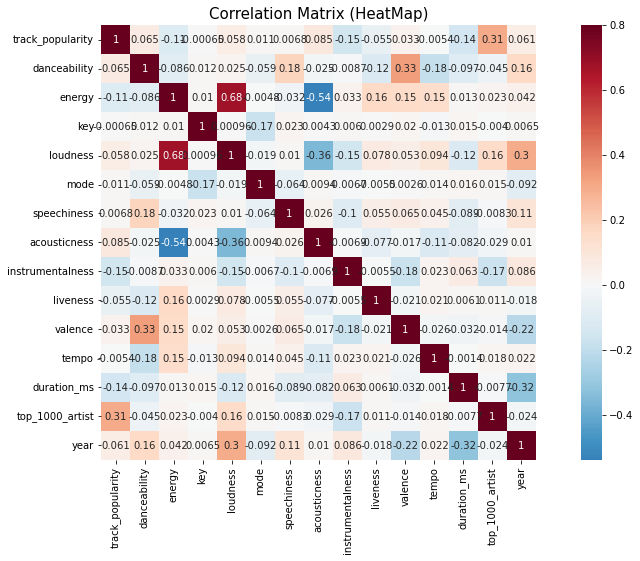

In [20]:
plt.figure(figsize=(16,8))
sns.heatmap(data_visu.corr(), annot=True,vmax=0.8,cmap='RdBu_r',square=True,center=0)
plt.title("Correlation Matrix (HeatMap)", fontsize = 15)
plt.show()

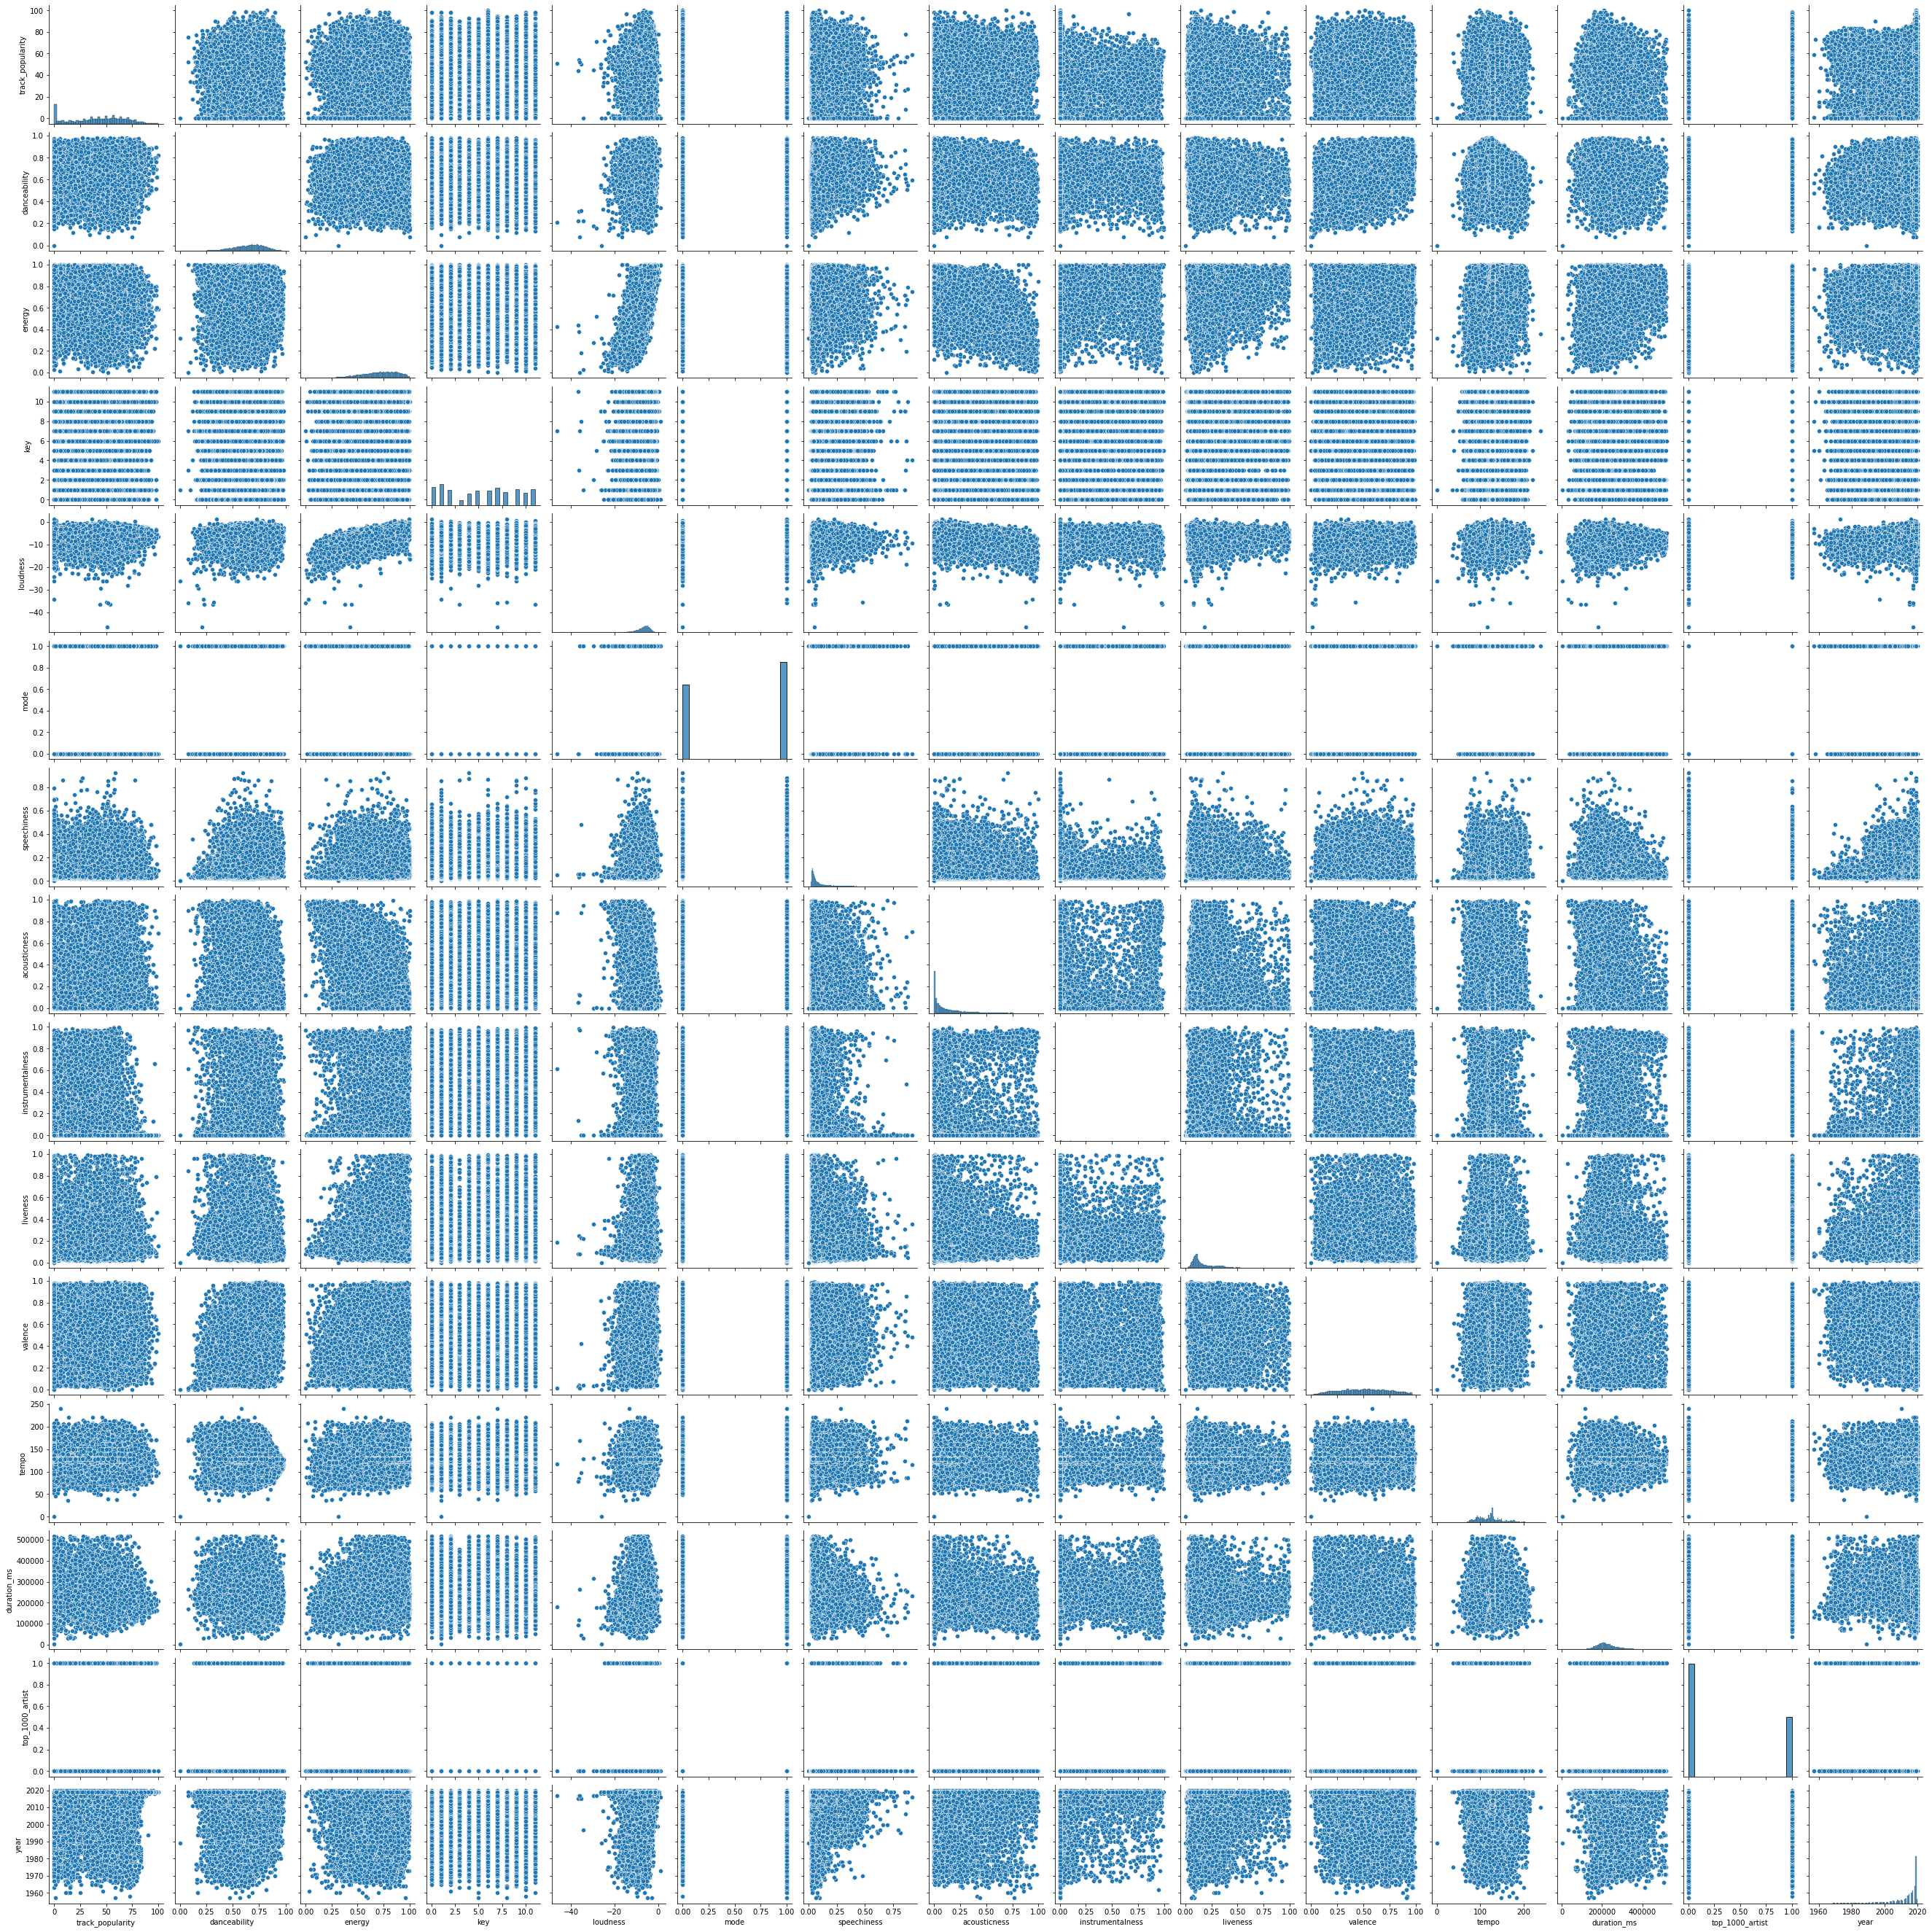

In [21]:
sns.pairplot(data_visu)

we can see top_1000_artist is strongly related to popularity
draw a boxplot to see how the singer's popularity will affect the song's popularity

<AxesSubplot:xlabel='top_1000_artist', ylabel='track_popularity'>

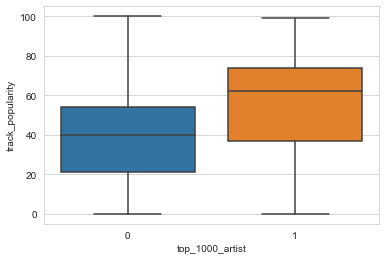

In [22]:
sns.set_style("whitegrid")

sns.boxplot(x="top_1000_artist", y="track_popularity", data=data_visu)

"year" is also strongly related to popularity
draw a line chart and a smooth line to see how popularity change with release year

Text(0, 0.5, 'Popularity')

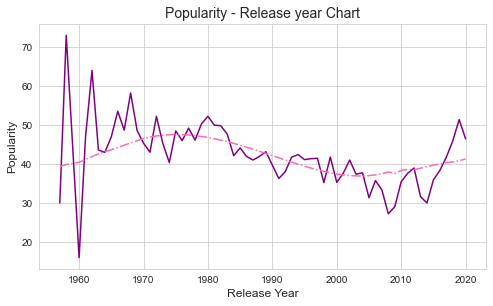

In [23]:
track_popularity_means = data_visu.groupby('year')['track_popularity'].mean() 
year_smooth = savgol_filter(track_popularity_means,99,5, mode= 'nearest')

plt.figure(figsize=(8, 4.5))     
plt.plot(track_popularity_means.index, track_popularity_means, 
         color='purple', linewidth=1.5) 
plt.plot(track_popularity_means.index, year_smooth, 
         color='HotPink', linewidth=1.5,linestyle='-.') 
plt.title('Popularity - Release year Chart', fontsize=14)  
plt.xlabel('Release Year', fontsize=12)                              
plt.ylabel('Popularity', fontsize=12)   

We can see that the data fluctuated greatly before 1970, so we check whether it was caused by too few data

In [24]:
before90 = data_visu['year'] < 1990  
check = data_visu.loc[before90]    
check

track_id                     track_name  \
1612   5VkHTogGhpdkLv0bOtlVjt                 Voice of Chunk   
1768   5XsMz0YfEaHZE0MTb1aujs    Wake Me Up Before You Go-Go   
1835   6pwQEpLOlwclrsjgEOHEp0           Shadows Of The Night   
1891   6Ac4NVYYl2U73QiTt11ZKd            Hooked on a Feeling   
1892   5IMtdHjJ1OtkxbGe4zfUxQ  Escape (The Pina Colada Song)   
...                       ...                            ...   
31666  1zaigPe4NB94tc4CRshK46                   Get It Right   
31675  2mCLc4lZjbpcpXgNBrC5lY             It Looks Like Love   
31678  3nFJbZCHP4d9vduKjJLdBL                 Never Too Much   
31690  2d6qTH3HKGwn75lpRtaEA1      I Feel Love - 12" Version   
31694  2bflwesbh5cKt0d9CxXPO7                    Dance Freak   

             track_artist  track_popularity          track_album_id  \
1612   The Lounge Lizards                35  6NjOkiaNpDXEjXvBoN4JOj   
1768                Wham!                26  0CpBTGH3Eewlbw35IclPdm   
1835          Pat Benatar                55  6WGt0GrbPx1NWlobn7j6zY   
1891           Blue Swede                75  6fBMaH0IiymemwFKmn18Ze   
1892        Rupert Holmes                71  163iYwl7Kdm9ayTnD4VyfN   
...                   ...               ...                     ...   
31666     Aretha Franklin                 2  0Pe124sDVootFFmCMhqeHO   
31675         Goody Goody                41  0X6uATczHL4Bz1y1lruCVC   
31678     Luther Vandross                69  1B4oPgG5ljWTRxsKcTHAYn   
31690        Donna Summer                 5  34qkfc2enZLwUhnrUGLLjb   
31694      Chain Reaction                29  5cajv6mRb8xTwNUjoVgSJ3   

                              track_album_name track_album_release_date  \
1612                            Voice Of Chunk                     1988   
1768                               Make It Big               1984-10-23   
1835                               Get Nervous               1982-01-01   
1891                       Hooked On A Feeling                     1973   
1892                         Partners In Crime               1979-01-01   
...                                        ...                      ...   
31666                             Get It Right                     1983   
31675                              Goody Goody                     1978   
31678                           Never Too Much               1981-07-23   
31690  Bad Girls [Deluxe Edition (US Version)]                     1979   
31694                              Dance Freak               1980-03-15   

                                        playlist_name             playlist_id  \
1612                         Pop Punk | Post-Hardcore  1YgWQAs1s77NzieIH4ARKn   
1768                                    Post pop teen  222nc9tKxKhfZ2GBrOpwH3   
1835                                🤩🤪Post Teen Pop🤪🤩  6IT8LGpwLw3Pt2XnVUBN7j   
1891                   Dr. Q's Prescription Playlist💊  6jAPdgY9XmxC9cgkXAVmVv   
1892                   Dr. Q's Prescription Playlist💊  6jAPdgY9XmxC9cgkXAVmVv   
...                                               ...                     ...   
31666  House/Electro/Progressive/Disco/Lofi/Synthwave  42jbIN5Zj0UUPdtmqxQRKF   
31675  House/Electro/Progressive/Disco/Lofi/Synthwave  42jbIN5Zj0UUPdtmqxQRKF   
31678  House/Electro/Progressive/Disco/Lofi/Synthwave  42jbIN5Zj0UUPdtmqxQRKF   
31690  House/Electro/Progressive/Disco/Lofi/Synthwave  42jbIN5Zj0UUPdtmqxQRKF   
31694  House/Electro/Progressive/Disco/Lofi/Synthwave  42jbIN5Zj0UUPdtmqxQRKF   

      playlist_genre  ... mode  speechiness  acousticness  instrumentalness  \
1612             pop  ...    0       0.1940       0.35300          0.420000   
1768             pop  ...    1       0.0562       0.18600          0.000000   
1835             pop  ...    1       0.0344       0.29000          0.000012   
1891             pop  ...    1       0.0805       0.26100          0.000000   
1892             pop  ...    1       0.0548       0.46700          0.000004   
...              ...  ...  ...          ...        

In [25]:
check['year'].value_counts(sort=True)

1988    193
1987    183
1985    144
1984    140
1976    133
1978    130
1989    129
1986    121
1983    118
1975    108
1973    104
1977    100
1980     97
1982     94
1981     87
1979     84
1970     82
1974     80
1972     74
1971     71
1969     56
1967     41
1968     23
1966     19
1965     12
1964      9
1963      5
1960      4
1962      2
1957      2
1958      1
1961      1
Name: year, dtype: int64

Before 1970, each year has less than 50 songs, and the sample size was too small. Therefore, we deleted the data before 1970 and only analyzed the trend after 1970

In [26]:
after70 = data_visu['year'] > 1970  
data_visu = data_visu.loc[after70]    
data_visu

track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32828  7bxnKAamR3snQ1VGLuVfC1   
32829  5Aevni09Em4575077nkWHz   
32830  7ImMqPP3Q1yfUHvsdn7wEo   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
32832  29zWqhca3zt5NsckZqDf6c   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32828               City Of Lights - Official Radio Edit      Lush & Simon   
32829                Closer - Sultan & Ned Shepard Remix    Tegan and Sara   
32830                       Sweet Surrender - Radio Edit       Starkillers   
32831                     Only For You - Maor Levi Remix            Mat Zo   
32832                             Typhoon - Original Mix      Julian Calor   

       track_popularity          track_album_id  \
0                    66  2oCs0DGTsRO98Gh5ZSl2Cx   
1                    67  63rPSO264uRjW1X5E6cWv6   
2                    70  1HoSmj2eLcsrR0vE9gThr4   
3                    60  1nqYsOef1yKKuGOVchbsk6   
4                    69  7m7vv9wlQ4i0LFuJiE2zsQ   
...                 ...                     ...   
32828                42  2azRoBBWEEEYhqV6sb7JrT   
32829                20  6kD6KLxj7s8eCE3ABvAyf5   
32830                14  0ltWNSY9JgxoIZO4VzuCa6   
32831                15  1fGrOkHnHJcStl14zNx8Jy   
32832                27  0X3mUOm6MhxR7PzxG95rAo   

                                        track_album_name  \
0      I Don't Care (with Justin Bieber) [Loud Luxury...   
1                        Memories (Dillon Francis Remix)   
2                        All the Time (Don Diablo Remix)   
3                            Call You Mine - The Remixes   
4                Someone You Loved (Future Humans Remix)   
...                                                  ...   
32828                         City Of Lights (Vocal Mix)   
32829                                     Closer Remixed   
32830                       Sweet Surrender (Radio Edit)   
32831                             Only For You (Remixes)   
32832                                      Typhoon/Storm   

      track_album_release_date    playlist_name             playlist_id  \
0                   2019-06-14        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
1                   2019-12-13        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
2                   2019-07-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
3                   2019-07-19        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
4                   2019-03-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
...                        ...              ...                     ...   
32828               2014-04-28  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32829               2013-03-08  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32830               2014-04-21  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32831               2014-01-01  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32832               2014-03-03  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   

      playlist_genre  ... mode  speechiness  acousticness  instrumentalness  \
0                pop  ...    1       0.0583      0.102000          0.000000   
1                pop  ...    1       0.0373      0.072400          0.004210   
2                pop  ...    0       0.0742      0.079400          0.000023   
3                pop  ...    1       0.1020      0.028700          0.000009   
4                pop  ...    1       0.0359      0.080300

let's track the trend again

Text(0, 0.5, 'Popularity')

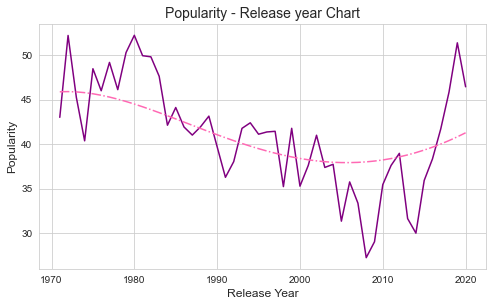

In [27]:
track_popularity_means = data_visu.groupby('year')['track_popularity'].mean() 
year_smooth = savgol_filter(track_popularity_means,99,5, mode= 'nearest')

plt.figure(figsize=(8, 4.5))     
plt.plot(track_popularity_means.index, track_popularity_means, 
         color='purple', linewidth=1.5) 
plt.plot(track_popularity_means.index, year_smooth, 
         color='HotPink', linewidth=1.5,linestyle='-.') 
plt.title('Popularity - Release year Chart', fontsize=14)  
plt.xlabel('Release Year', fontsize=12)                              
plt.ylabel('Popularity', fontsize=12) 

we can see that the popularity first drop and then rise, meaning that people love the latest popular song and some retro songs. The songs released 10 years ago are the least popular.
since we already know that release year is closely related with popularity, and people like the latest songs, then we can track the trend of each strongly related attributes.

Text(0, 0.5, 'Acousticness')

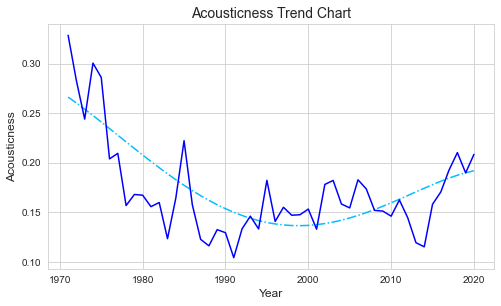

In [28]:
acousticness_means = data_visu.groupby('year')['acousticness'].mean() 
y_smooth = savgol_filter(acousticness_means,99,5, mode= 'nearest')

plt.figure(figsize=(8, 4.5))     
plt.plot(acousticness_means.index, y_smooth, 
         color='DeepSkyBlue', linewidth=1.5,linestyle='-.') 
plt.plot(acousticness_means.index, acousticness_means, 
         color='blue', linewidth=1.5) 
plt.title('Acousticness Trend Chart', fontsize=14)  
plt.xlabel('Year', fontsize=12)                              
plt.ylabel('Acousticness', fontsize=12)    


Text(0, 0.5, 'Acousticness')

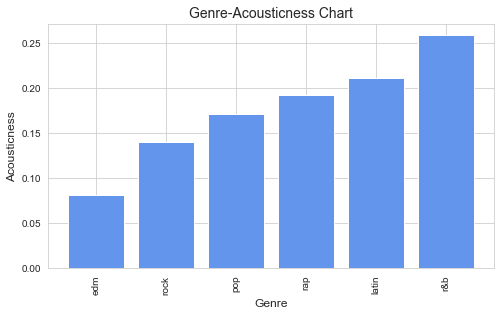

In [29]:
genre_acousticness= data_visu.groupby('playlist_genre')['acousticness'].mean()   
genre_acousticness=genre_acousticness.sort_values()
plt.figure(figsize=(8, 4.5))     
plt.bar(genre_acousticness.index, genre_acousticness, 
          color='CornflowerBlue') 
plt.title('Genre-Acousticness Chart', fontsize=14)  
plt.xlabel('Genre', fontsize=12)
plt.xticks(fontsize=10,rotation=90)     
plt.ylabel('Acousticness', fontsize=12)   

Text(0, 0.5, 'Loudness')

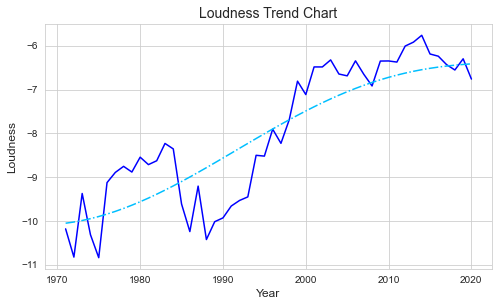

In [30]:
loudness_means = data_visu.groupby('year')['loudness'].mean() 
y_smooth1 = savgol_filter(loudness_means, 99, 5, mode= 'nearest')

plt.figure(figsize=(8, 4.5))     
plt.plot(loudness_means.index, loudness_means, 
         color='blue', linewidth=1.5) 
plt.plot(acousticness_means.index, y_smooth1, 
         color='DeepSkyBlue', linewidth=1.5,linestyle='-.') 
plt.title('Loudness Trend Chart', fontsize=14)  
plt.xlabel('Year', fontsize=12)                              
plt.ylabel('Loudness', fontsize=12)   

Text(0, 0.5, 'Loudness')

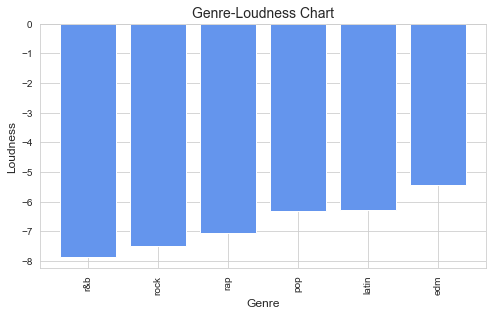

In [31]:
genre_loudness= data_visu.groupby('playlist_genre')['loudness'].mean()
genre_loudness=genre_loudness.sort_values()
plt.figure(figsize=(8, 4.5))     
plt.bar(genre_loudness.index, genre_loudness, 
          color='CornflowerBlue') 
plt.title('Genre-Loudness Chart', fontsize=14)  
plt.xlabel('Genre', fontsize=12)
plt.xticks(fontsize=10,rotation=90)     
plt.ylabel('Loudness', fontsize=12)   

Text(0, 0.5, 'Valence')

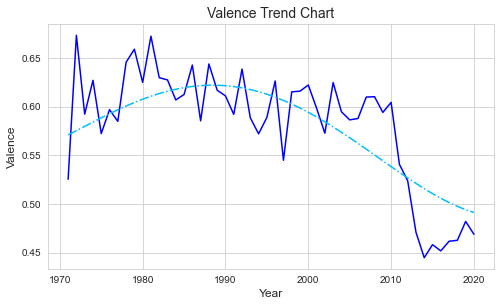

In [32]:
valence_means = data_visu.groupby('year')['valence'].mean() 
y_smooth2 = savgol_filter(valence_means, 99, 5, mode= 'nearest')

plt.figure(figsize=(8, 4.5))     
plt.plot(valence_means.index, valence_means, 
         color='Blue', linewidth=1.5) 
plt.plot(acousticness_means.index, y_smooth2, 
         color='DeepSkyBlue', linewidth=1.5,linestyle='-.') 
plt.title('Valence Trend Chart', fontsize=14)  
plt.xlabel('Year', fontsize=12)                              
plt.ylabel('Valence', fontsize=12)   

Text(0, 0.5, 'Valence')

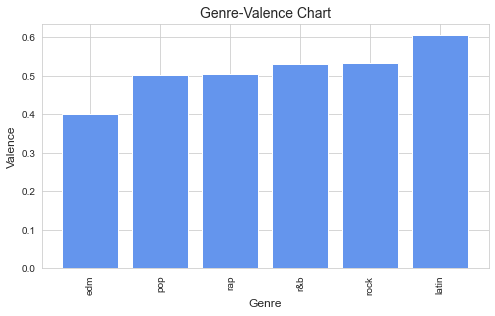

In [33]:
genre_valence= data_visu.groupby('playlist_genre')['valence'].mean()  
genre_valence=genre_valence.sort_values()
plt.figure(figsize=(8, 4.5))     
plt.bar(genre_valence.index, genre_valence, 
          color='CornflowerBlue') 
plt.title('Genre-Valence Chart', fontsize=14)  
plt.xlabel('Genre', fontsize=12)
plt.xticks(fontsize=10,rotation=90)     
plt.ylabel('Valence', fontsize=12)   

Text(0, 0.5, 'Energy')

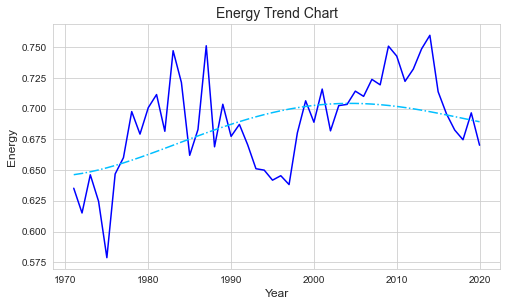

In [34]:
energy_means = data_visu.groupby('year')['energy'].mean() 
y_smooth3 = savgol_filter(energy_means, 99, 5, mode= 'nearest')

plt.figure(figsize=(8, 4.5))     
plt.plot(energy_means.index, energy_means, 
         color='Blue', linewidth=1.5) 
plt.plot(energy_means.index, y_smooth3, 
         color='DeepSkyBlue', linewidth=1.5,linestyle='-.') 
plt.title('Energy Trend Chart', fontsize=14)  
plt.xlabel('Year', fontsize=12)                              
plt.ylabel('Energy', fontsize=12)   

Text(0, 0.5, 'Energy')

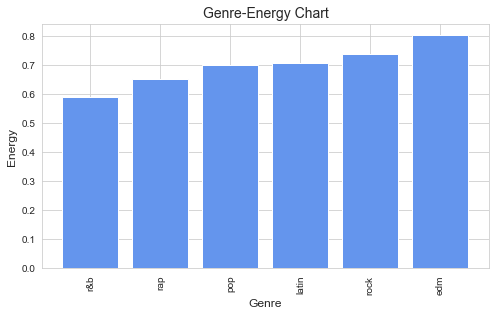

In [35]:
genre_energy= data_visu.groupby('playlist_genre')['energy'].mean()   
genre_energy=genre_energy.sort_values()
plt.figure(figsize=(8, 4.5))     
plt.bar(genre_energy.index, genre_energy, 
          color='CornflowerBlue') 
plt.title('Genre-Energy Chart', fontsize=14)  
plt.xlabel('Genre', fontsize=12)
plt.xticks(fontsize=10,rotation=90)     
plt.ylabel('Energy', fontsize=12)   

Text(0, 0.5, 'Instrumentalness')

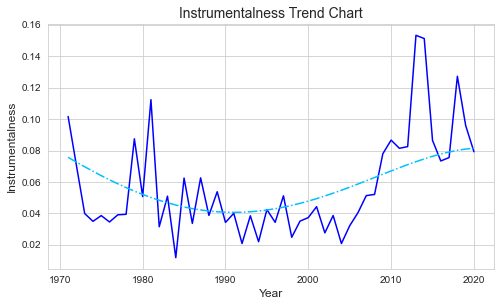

In [36]:
instrumentalness_means = data_visu.groupby('year')['instrumentalness'].mean() 
y_smooth4 = savgol_filter(instrumentalness_means, 99, 5, mode= 'nearest')

plt.figure(figsize=(8, 4.5))     
plt.plot(instrumentalness_means.index, instrumentalness_means, 
         color='Blue', linewidth=1.5) 
plt.plot(instrumentalness_means.index, y_smooth4, 
         color='DeepSkyBlue', linewidth=1.5,linestyle='-.') 
plt.title('Instrumentalness Trend Chart', fontsize=14)  
plt.xlabel('Year', fontsize=12)                              
plt.ylabel('Instrumentalness', fontsize=12)  

Text(0, 0.5, 'Instrumentalness')

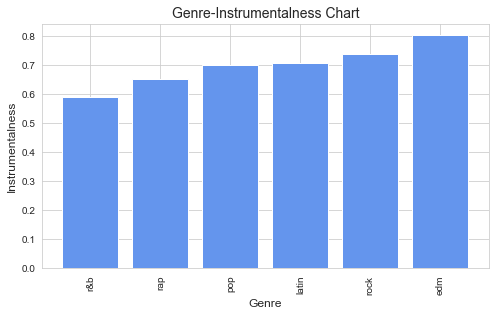

In [37]:
genre_instrumentalness= data_visu.groupby('playlist_genre')['instrumentalness'].mean()   
genre_instrumentalness=genre_energy.sort_values()
plt.figure(figsize=(8, 4.5))     
plt.bar(genre_instrumentalness.index, genre_instrumentalness, 
          color='CornflowerBlue') 
plt.title('Genre-Instrumentalness Chart', fontsize=14)  
plt.xlabel('Genre', fontsize=12)
plt.xticks(fontsize=10,rotation=90)     
plt.ylabel('Instrumentalness', fontsize=12)   

Text(0, 0.5, 'Danceability')

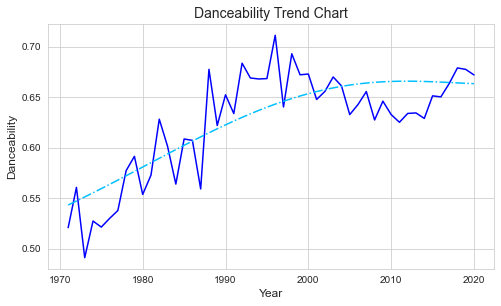

In [38]:
danceability_means = data_visu.groupby('year')['danceability'].mean() 
y_smooth5 = savgol_filter(danceability_means, 99, 5, mode= 'nearest')

plt.figure(figsize=(8, 4.5))     
plt.plot(danceability_means.index, danceability_means, 
         color='Blue', linewidth=1.5) 
plt.plot(danceability_means.index, y_smooth5, 
         color='DeepSkyBlue', linewidth=1.5,linestyle='-.') 
plt.title('Danceability Trend Chart', fontsize=14)  
plt.xlabel('Year', fontsize=12)                              
plt.ylabel('Danceability', fontsize=12)   

Text(0, 0.5, 'Danceability')

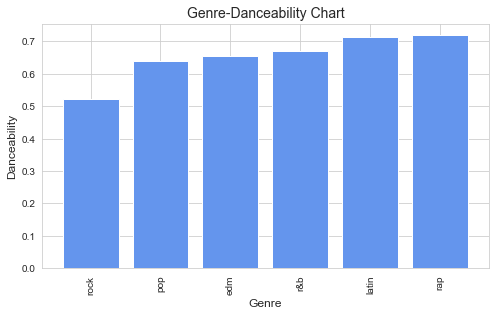

In [39]:
genre_danceability= data_visu.groupby('playlist_genre')['danceability'].mean()  
genre_danceability=genre_danceability.sort_values()
plt.figure(figsize=(8, 4.5))     
plt.bar(genre_danceability.index, genre_danceability, 
          color='CornflowerBlue') 
plt.title('Genre-Danceability Chart', fontsize=14)  
plt.xlabel('Genre', fontsize=12)
plt.xticks(fontsize=10,rotation=90)     
plt.ylabel('Danceability', fontsize=12)  

## Linear regression

In [40]:
data_lr = pd.read_csv("data with top_1000_artists.csv")
pd.set_option('display.max_columns', None)
data_lr.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre playlist_subgenre  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748   0.916    6    -2.634     1       0.0583        0.1020   
1         0.726   0.815   11    -4.969     1       0.0373        0.0724   
2         0.675   0.931    1    -3.432     0       0.0742        0.0794   
3         0.718   0.930    7    -3.778     1       0.1020        0.0287   
4         0.650   0.833    1    -4.672     1       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo  duration_ms  top_1000_artist  
0          0.000000    0.0653    0.518  122.036       194754                1  
1          0.004210    0.3570    0.693   99.972       162600                1  
2          0.000023    0.1100    0.613  124.008       176616                1  
3          0.000009    0.2040    0.277  121.956       169093                1  
4          0.000000    0.0833    0.725  123.976       189052                1

In [41]:
data_lr['year'] = pd.DatetimeIndex(data_lr['track_album_release_date']).year
data_lr = pd.DataFrame.dropna(data_lr)

In [42]:
data_lr['playlist_genre'].value_counts()

edm      6043
rap      5743
pop      5507
r&b      5431
latin    5153
rock     4951
Name: playlist_genre, dtype: int64

In [43]:
most_popular = data_lr.loc[data_lr['top_1000_artist'] == 1]
most_popular

track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32812  73ExUbskoIkjU0llIwsSzu   
32817  2OgOeXUb4bIXE4vGDVDaRO   
32823  0coMLoVcagZPGF5zxc5RF8   
32824  3zKST4nk4QJE77oLjUZ0Ng   
32826  1EavLSmwRWtmkKEmlCfFzT   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32812                                 X You - Radio Edit            Avicii   
32817                                            EIFORYA  Armin van Buuren   
32823             Everybody Is In The Place - Radio Edit          Hardwell   
32824                                        Hey Brother            Avicii   
32826                                             Wasted            Tiësto   

       track_popularity          track_album_id  \
0                    66  2oCs0DGTsRO98Gh5ZSl2Cx   
1                    67  63rPSO264uRjW1X5E6cWv6   
2                    70  1HoSmj2eLcsrR0vE9gThr4   
3                    60  1nqYsOef1yKKuGOVchbsk6   
4                    69  7m7vv9wlQ4i0LFuJiE2zsQ   
...                 ...                     ...   
32812                 5  4TIO4EhBRDHFpLaxpE9Twp   
32817                33  40IMv2dwOU1C6ZSuuolZzk   
32823                28  1PdMbB6qgSzS9zcT9xP6Kx   
32824                20  02h9kO2oLKnLtycgbElKsw   
32826                47  584m4QL0kmpG69zSpMKvv8   

                                        track_album_name  \
0      I Don't Care (with Justin Bieber) [Loud Luxury...   
1                        Memories (Dillon Francis Remix)   
2                        All the Time (Don Diablo Remix)   
3                            Call You Mine - The Remixes   
4                Someone You Loved (Future Humans Remix)   
...                                                  ...   
32812                                              X You   
32817                                            EIFORYA   
32823             Everybody Is In The Place (Radio Edit)   
32824                                               True   
32826                                             Wasted   

      track_album_release_date    playlist_name             playlist_id  \
0                   2019-06-14        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
1                   2019-12-13        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
2                   2019-07-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
3                   2019-07-19        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
4                   2019-03-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
...                        ...              ...                     ...   
32812               2013-01-01  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32817               2014-04-14  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32823               2014-04-18  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32824               2013-01-01  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32826               2014-04-22  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   

      playlist_genre          playlist_subgenre  danceability  energy  key  \
0                pop                  dance pop         0.748   0.916    6   
1                pop                  dance pop         0.726   0.815   11   
2                pop                  dance pop         0.675   0.931    1   
3                pop                  dance pop         0.718   0.930    7   
4                pop                  dance pop         0.650 

In [44]:
mostpopular = smf.ols('track_popularity ~ year + danceability + key + loudness + energy + speechiness + acousticness + playlist_subgenre + valence + tempo + duration_ms', most_popular)
popularresult = mostpopular.fit()

print(popularresult.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     64.08
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:16:40   Log-Likelihood:                -52362.
No. Observations:               11275   AIC:                         1.048e+05
Df Residuals:                   11241   BIC:                         1.050e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [45]:
model = smf.ols('track_popularity ~ top_1000_artist + year + danceability + energy + key + loudness + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms', data_lr)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     438.2
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:16:40   Log-Likelihood:            -1.4960e+05
No. Observations:               32828   AIC:                         2.992e+05
Df Residuals:                   32814   BIC:                         2.993e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.6146     27.477  

In [46]:
edm = data_lr.loc[data_lr['playlist_genre'] == 'edm']
edm

track_id                            track_name  \
26790  366S9c0rQtvrkclcCSRNmB  Disease - KATFYR "Tokyo Bound" Remix   
26791  0nEeyKLtk5vTlbcdvgrCOH                         Infinite Ammo   
26792  4gxukDJiwApNEgVIh4pHgT                                   WOW   
26793  3mLLlN1ZdHmlJHkvNON7ou           Threnody - Bombs Away Remix   
26794  17NCISfYJl0GITXs8G75Ae                          Loudness War   
...                       ...                                   ...   
32828  7bxnKAamR3snQ1VGLuVfC1  City Of Lights - Official Radio Edit   
32829  5Aevni09Em4575077nkWHz   Closer - Sultan & Ned Shepard Remix   
32830  7ImMqPP3Q1yfUHvsdn7wEo          Sweet Surrender - Radio Edit   
32831  2m69mhnfQ1Oq6lGtXuYhgX        Only For You - Maor Levi Remix   
32832  29zWqhca3zt5NsckZqDf6c                Typhoon - Original Mix   

          track_artist  track_popularity          track_album_id  \
26790          Naeleck                43  4s3VdQXA9G1RA2a4RrCCKN   
26791  Le Castle Vania                46  3AdNvHp7wzEBY0DYz8Oiq6   
26792           Tiësto                10  4I2qcrUxk37AoJOMjiOCvu   
26793          Naeleck                50  2CUUZuC9EhMcnU7zdNWWrI   
26794       Fukkk Offf                33  0vXDfJsurQa6rZayRwvgtQ   
...                ...               ...                     ...   
32828     Lush & Simon                42  2azRoBBWEEEYhqV6sb7JrT   
32829   Tegan and Sara                20  6kD6KLxj7s8eCE3ABvAyf5   
32830      Starkillers                14  0ltWNSY9JgxoIZO4VzuCa6   
32831           Mat Zo                15  1fGrOkHnHJcStl14zNx8Jy   
32832     Julian Calor                27  0X3mUOm6MhxR7PzxG95rAo   

                   track_album_name track_album_release_date  \
26790                       Disease               2013-09-16   
26791                        Payday               2015-10-23   
26792                           WOW               2018-08-24   
26793                      Threnody               2016-12-26   
26794                  Loudness War               2019-07-12   
...                             ...                      ...   
32828    City Of Lights (Vocal Mix)               2014-04-28   
32829                Closer Remixed               2013-03-08   
32830  Sweet Surrender (Radio Edit)               2014-04-21   
32831        Only For You (Remixes)               2014-01-01   
32832                 Typhoon/Storm               2014-03-03   

            playlist_name             playlist_id playlist_genre  \
26790  Electro House 2020  317O0e8iWJLClLGDKtieRe            edm   
26791  Electro House 2020  317O0e8iWJLClLGDKtieRe            edm   
26792  Electro House 2020  317O0e8iWJLClLGDKtieRe            edm   
26793  Electro House 2020  317O0e8iWJLClLGDKtieRe            edm   
26794  Electro House 2020  317O0e8iWJLClLGDKtieRe            edm   
...                   ...                     ...            ...   
32828     ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux            edm   
32829     ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux            edm   
32830     ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux            edm   
32831     ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux            edm   
32832     ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux            edm   

               playlist_subgenre  danceability  energy  key  loudness  mode  \
26790              electro house         0.677   0.926    0    -3.307     1   
26791              electro house         0.597   0.960    7    -1.940     0   
26792              electro house         0.601   0.990    6    -3.016     1   
26793              electro house         0.836   0.926    2    -3.728     1   
26794              electro house         0.843   0.844    2    -4.779     1   
...                          ...           ...     ...  ...       ...   ...   
32828  progressive electro house         0.428   0.922    2    -1.814     1   
32829  progressive electro house         0.522   0.786    0    -4.462     1   
32830  progressive electro house         0.529   0.821

In [47]:
popedm = most_popular.loc[most_popular['playlist_genre'] == 'edm']
popedm

track_id  \
26792  4gxukDJiwApNEgVIh4pHgT   
26812  2Ceq5Ty6rJqazoZIWyS0Vc   
26815  5plG80hc7j4siXDhcUamjU   
26817  575NJxNUVDqwJGdzBrlLbv   
26818  7MYX0Vu0uMjVLCiy804sdX   
...                       ...   
32812  73ExUbskoIkjU0llIwsSzu   
32817  2OgOeXUb4bIXE4vGDVDaRO   
32823  0coMLoVcagZPGF5zxc5RF8   
32824  3zKST4nk4QJE77oLjUZ0Ng   
32826  1EavLSmwRWtmkKEmlCfFzT   

                                              track_name      track_artist  \
26792                                                WOW            Tiësto   
26812          Ocean (feat. Khalid) - David Guetta Remix     Martin Garrix   
26815                      Promises - David Guetta Remix     Calvin Harris   
26817                              Lost In Japan - Remix      Shawn Mendes   
26818  Summertime Sadness (Lana Del Rey Vs. Cedric Ge...      Lana Del Rey   
...                                                  ...               ...   
32812                                 X You - Radio Edit            Avicii   
32817                                            EIFORYA  Armin van Buuren   
32823             Everybody Is In The Place - Radio Edit          Hardwell   
32824                                        Hey Brother            Avicii   
32826                                             Wasted            Tiësto   

       track_popularity          track_album_id  \
26792                10  4I2qcrUxk37AoJOMjiOCvu   
26812                64  2lYxgMaJP2bGy4dhIToqzS   
26815                 8  191HBwuAFkDLbtQfyi1EYs   
26817                75  3ynoYncFXzo2OfPT8j93Pw   
26818                54  2vFyRm6ZrYI7ravDNolYsr   
...                 ...                     ...   
32812                 5  4TIO4EhBRDHFpLaxpE9Twp   
32817                33  40IMv2dwOU1C6ZSuuolZzk   
32823                28  1PdMbB6qgSzS9zcT9xP6Kx   
32824                20  02h9kO2oLKnLtycgbElKsw   
32826                47  584m4QL0kmpG69zSpMKvv8   

                                        track_album_name  \
26792                                                WOW   
26812          Ocean (feat. Khalid) [David Guetta Remix]   
26815                      Promises (David Guetta Remix)   
26817                              Lost In Japan (Remix)   
26818  Summertime Sadness [Lana Del Rey vs. Cedric Ge...   
...                                                  ...   
32812                                              X You   
32817                                            EIFORYA   
32823             Everybody Is In The Place (Radio Edit)   
32824                                               True   
32826                                             Wasted   

      track_album_release_date       playlist_name             playlist_id  \
26792               2018-08-24  Electro House 2020  317O0e8iWJLClLGDKtieRe   
26812               2018-08-17  Electro House 2020  317O0e8iWJLClLGDKtieRe   
26815               2018-10-12  Electro House 2020  317O0e8iWJLClLGDKtieRe   
26817               2018-09-27  Electro House 2020  317O0e8iWJLClLGDKtieRe   
26818               2013-02-01  Electro House 2020  317O0e8iWJLClLGDKtieRe   
...                        ...                 ...                     ...   
32812               2013-01-01     ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32817               2014-04-14     ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32823               2014-04-18     ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32824               2013-01-01     ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32826               2014-04-22     ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   

      playlist_genre          playlist_subgenre  danceability  energy  key  \
26792            edm              electro house         0.601   0.990    6   
26812            edm              electro house         0.609   0.824    0   
26815            edm              electro house         0.588   0.697    3   
26817            edm              electro house         0.706   0.855   10   
26818            edm      

In [48]:
popular_edm = smf.ols('track_popularity ~ year + playlist_subgenre + danceability + energy + key + loudness + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms', popedm)
result_popedm = popular_edm.fit()

print(result_popedm.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     37.08
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           2.50e-92
Time:                        23:16:41   Log-Likelihood:                -7250.9
No. Observations:                1587   AIC:                         1.453e+04
Df Residuals:                    1571   BIC:                         1.462e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [49]:
model_edm = smf.ols('track_popularity ~ year + danceability + key + loudness + energy + speechiness + acousticness + playlist_subgenre + valence + tempo + duration_ms', edm)
result_edm = model_edm.fit()

print(result_edm.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     100.6
Date:                Sat, 19 Nov 2022   Prob (F-statistic):          4.19e-245
Time:                        23:16:42   Log-Likelihood:                -26969.
No. Observations:                6043   AIC:                         5.397e+04
Df Residuals:                    6029   BIC:                         5.406e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [50]:
rap = data_lr.loc[data_lr['playlist_genre'] == 'rap']
rap

track_id                   track_name  track_artist  \
5507   5yY9lUy8nbvjM1Uyo1Uqoc   Life Is Good (feat. Drake)        Future   
5508   0nbXyq5TXYPCO7pr3N8S4I                      The Box   Roddy Ricch   
5509   3R8CyhJfVjvgIROd5RSGhQ                    I Can See    Mac Miller   
5510   2Ec33AVlkTTq8BHFgBTdQs          Futsal Shuffle 2020  Lil Uzi Vert   
5511   7FIWs0pqAYbP91WWM0vlTQ  Godzilla (feat. Juice WRLD)        Eminem   
...                       ...                          ...           ...   
11248  1BxkZE73h9BN3qwuA15TA3                Drip Too Hard      Lil Baby   
11249  4qKcDkK6siZ7Jp1Jb4m0aL     Look Alive (feat. Drake)    BlocBoy JB   
11250  3lyeSiAIdLoZUHhV8psOTI                 Feed Me Dope        Future   
11251  0frzpcv2zCUk13mn0X824T                         Mall    Gucci Mane   
11252  36evXa8bNvfBYNzePEWhG1              New Level REMIX     A$AP Ferg   

       track_popularity          track_album_id  \
5507                 93  5uCEoLCj3ZZZ1EtzQdQWVl   
5508                 98  52u4anZbHd6UInnmHRFzba   
5509                 73  5sY6UIQ32GqwMLAfSNEaXb   
5510                 91  4uTOUYhLrGRKkfxfPKTkuy   
5511                 79  4otkd9As6YaxxEkIjXPiZ6   
...                 ...                     ...   
11248                12  0LfKQSbicPG4QTTVkS0fes   
11249                79  7GGoJfKFOwDNuiLjjfzyCS   
11250                56  187UNqZ7MX3neMYkkevmdm   
11251                43  1u5gq15cYorEthAD0IDDOB   
11252                55  3c5lXufvveeuYbYnTNZxNl   

                            track_album_name track_album_release_date  \
5507              Life Is Good (feat. Drake)               2020-01-10   
5508   Please Excuse Me For Being Antisocial               2019-12-06   
5509                                 Circles               2020-01-17   
5510                     Futsal Shuffle 2020               2019-12-12   
5511                 Music To Be Murdered By               2020-01-17   
...                                      ...                      ...   
11248                          Drip Too Hard               2018-09-12   
11249               Look Alive (feat. Drake)               2018-02-09   
11250                           SUPER SLIMEY               2017-10-20   
11251             El Gato: The Human Glacier               2017-12-22   
11252                        New Level REMIX               2016-10-20   

        playlist_name             playlist_id playlist_genre  \
5507        RapCaviar  37i9dQZF1DX0XUsuxWHRQd            rap   
5508        RapCaviar  37i9dQZF1DX0XUsuxWHRQd            rap   
5509        RapCaviar  37i9dQZF1DX0XUsuxWHRQd            rap   
5510        RapCaviar  37i9dQZF1DX0XUsuxWHRQd            rap   
5511        RapCaviar  37i9dQZF1DX0XUsuxWHRQd            rap   
...               ...                     ...            ...   
11248  Trap Americana  7tkgK1tm9hYkWp7EFyOcAr            rap   
11249  Trap Americana  7tkgK1tm9hYkWp7EFyOcAr            rap   
11250  Trap Americana  7tkgK1tm9hYkWp7EFyOcAr            rap   
11251  Trap Americana  7tkgK1tm9hYkWp7EFyOcAr            rap   
11252  Trap Americana  7tkgK1tm9hYkWp7EFyOcAr            rap   

      playlist_subgenre  danceability  energy  key  loudness  mode  \
5507            hip hop         0.676   0.609    2    -5.831     0   
5508            hip hop         0.896   0.586   10    -6.687     0   
5509            hip hop         0.699   0.503    5    -9.922     0   
5510            hip hop         0.881   0.457    7    -8.191     0   
5511            hip hop         0.808   0.745   10    -5.260     0   
...                 ...           ...     ...  ...       ...   ...   
11248              trap         0.900   0.653    1    -6.962     0   
11249              trap         0.922   0.581   10    -7.495     1   
11250              trap         0.853   0.688    8    -6.509     0   
11251              trap         0.749   0.809   11    -7.649     1   
11252              trap         0.711   0.663   11    -5.805     1   

       s

In [51]:
poprap = most_popular.loc[most_popular['playlist_genre'] == 'rap']
poprap

track_id                    track_name  track_artist  \
5507   5yY9lUy8nbvjM1Uyo1Uqoc    Life Is Good (feat. Drake)        Future   
5508   0nbXyq5TXYPCO7pr3N8S4I                       The Box   Roddy Ricch   
5509   3R8CyhJfVjvgIROd5RSGhQ                     I Can See    Mac Miller   
5510   2Ec33AVlkTTq8BHFgBTdQs           Futsal Shuffle 2020  Lil Uzi Vert   
5511   7FIWs0pqAYbP91WWM0vlTQ   Godzilla (feat. Juice WRLD)        Eminem   
...                       ...                           ...           ...   
11247  6j0teRL3WdExzqmy334sh5  Seven Million (feat. Future)  Lil Uzi Vert   
11248  1BxkZE73h9BN3qwuA15TA3                 Drip Too Hard      Lil Baby   
11250  3lyeSiAIdLoZUHhV8psOTI                  Feed Me Dope        Future   
11251  0frzpcv2zCUk13mn0X824T                          Mall    Gucci Mane   
11252  36evXa8bNvfBYNzePEWhG1               New Level REMIX     A$AP Ferg   

       track_popularity          track_album_id  \
5507                 93  5uCEoLCj3ZZZ1EtzQdQWVl   
5508                 98  52u4anZbHd6UInnmHRFzba   
5509                 73  5sY6UIQ32GqwMLAfSNEaXb   
5510                 91  4uTOUYhLrGRKkfxfPKTkuy   
5511                 79  4otkd9As6YaxxEkIjXPiZ6   
...                 ...                     ...   
11247                63  6LX75kNicFqjjiAOeZgN67   
11248                12  0LfKQSbicPG4QTTVkS0fes   
11250                56  187UNqZ7MX3neMYkkevmdm   
11251                43  1u5gq15cYorEthAD0IDDOB   
11252                55  3c5lXufvveeuYbYnTNZxNl   

                            track_album_name track_album_release_date  \
5507              Life Is Good (feat. Drake)               2020-01-10   
5508   Please Excuse Me For Being Antisocial               2019-12-06   
5509                                 Circles               2020-01-17   
5510                     Futsal Shuffle 2020               2019-12-12   
5511                 Music To Be Murdered By               2020-01-17   
...                                      ...                      ...   
11247                   The Perfect LUV Tape               2016-08-10   
11248                          Drip Too Hard               2018-09-12   
11250                           SUPER SLIMEY               2017-10-20   
11251             El Gato: The Human Glacier               2017-12-22   
11252                        New Level REMIX               2016-10-20   

        playlist_name             playlist_id playlist_genre  \
5507        RapCaviar  37i9dQZF1DX0XUsuxWHRQd            rap   
5508        RapCaviar  37i9dQZF1DX0XUsuxWHRQd            rap   
5509        RapCaviar  37i9dQZF1DX0XUsuxWHRQd            rap   
5510        RapCaviar  37i9dQZF1DX0XUsuxWHRQd            rap   
5511        RapCaviar  37i9dQZF1DX0XUsuxWHRQd            rap   
...               ...                     ...            ...   
11247  Trap Americana  7tkgK1tm9hYkWp7EFyOcAr            rap   
11248  Trap Americana  7tkgK1tm9hYkWp7EFyOcAr            rap   
11250  Trap Americana  7tkgK1tm9hYkWp7EFyOcAr            rap   
11251  Trap Americana  7tkgK1tm9hYkWp7EFyOcAr            rap   
11252  Trap Americana  7tkgK1tm9hYkWp7EFyOcAr            rap   

      playlist_subgenre  danceability  energy  key  loudness  mode  \
5507            hip hop         0.676   0.609    2    -5.831     0   
5508            hip hop         0.896   0.586   10    -6.687     0   
5509            hip hop         0.699   0.503    5    -9.922     0   
5510            hip hop         0.881   0.457    7    -8.191     0   
5511            hip hop         0.808   0.745   10    -5.260     0   
...                 ...           ...     ...  ...       ...   ...   
11247              trap         0.886   0.629    1    -4.404     0   
11248              trap         0.900   0.653    1    -6.962     0   
11250              trap         0.853   0.688    8    -6.509     0   
11251              trap         0.749   0.809   11    -7.649     1   
11252              trap         0.711   0.663   11    -5.805     1 

In [52]:
popular_rap = smf.ols('track_popularity ~ year + playlist_subgenre + danceability + energy + key + loudness + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms', poprap)
result_poprap = popular_rap.fit()

print(result_poprap.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           4.88e-51
Time:                        23:16:44   Log-Likelihood:                -8689.2
No. Observations:                1848   AIC:                         1.741e+04
Df Residuals:                    1832   BIC:                         1.750e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [53]:
model_rap = smf.ols('track_popularity ~ year + danceability + key + loudness + energy + speechiness + acousticness + playlist_subgenre + valence + tempo + duration_ms', rap)
result_rap = model_rap.fit()
print(result_rap.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     77.97
Date:                Sat, 19 Nov 2022   Prob (F-statistic):          2.34e-191
Time:                        23:16:44   Log-Likelihood:                -25759.
No. Observations:                5743   AIC:                         5.155e+04
Df Residuals:                    5729   BIC:                         5.164e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [54]:
pop = data_lr.loc[data_lr['playlist_genre'] == 'pop']
pop

track_id  \
0     6f807x0ima9a1j3VPbc7VN   
1     0r7CVbZTWZgbTCYdfa2P31   
2     1z1Hg7Vb0AhHDiEmnDE79l   
3     75FpbthrwQmzHlBJLuGdC7   
4     1e8PAfcKUYoKkxPhrHqw4x   
...                      ...   
5502  27W2xRl5A5vUTuj0kX6YmW   
5503  087B7ONFOiKkkMVmg83md0   
5504  3jl1I9gvCXo5V9hu4hYGLY   
5505  5t7SHDPq9Ef7O92chdneBs   
5506  7j3nbSiaWphYU2cFgyQXd9   

                                             track_name      track_artist  \
0     I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                       Memories - Dillon Francis Remix          Maroon 5   
2                       All the Time - Don Diablo Remix      Zara Larsson   
3                     Call You Mine - Keanu Silva Remix  The Chainsmokers   
4               Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                 ...               ...   
5502                                           Lovesick    Fickle Friends   
5503                                        Hello Hello    Fickle Friends   
5504                                            Forever          CHVRCHES   
5505                                        Do It Again           No Rome   
5506                         Everything Is Embarrassing      Sky Ferreira   

      track_popularity          track_album_id  \
0                   66  2oCs0DGTsRO98Gh5ZSl2Cx   
1                   67  63rPSO264uRjW1X5E6cWv6   
2                   70  1HoSmj2eLcsrR0vE9gThr4   
3                   60  1nqYsOef1yKKuGOVchbsk6   
4                   69  7m7vv9wlQ4i0LFuJiE2zsQ   
...                ...                     ...   
5502                35  7LdUzhm4SloDil5y0sRen0   
5503                40  7LdUzhm4SloDil5y0sRen0   
5504                38  2hshVOA4ULsMGHPDiUaDbJ   
5505                46  1SaI0lheU4SO5fAzmKBYlG   
5506                49  0DucmDrdJM4evPXMbFJXBS   

                                       track_album_name  \
0     I Don't Care (with Justin Bieber) [Loud Luxury...   
1                       Memories (Dillon Francis Remix)   
2                       All the Time (Don Diablo Remix)   
3                           Call You Mine - The Remixes   
4               Someone You Loved (Future Humans Remix)   
...                                                 ...   
5502                               You Are Someone Else   
5503                               You Are Someone Else   
5504                                       Love Is Dead   
5505                                        Do It Again   
5506                                Night Time, My Time   

     track_album_release_date    playlist_name             playlist_id  \
0                  2019-06-14        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
1                  2019-12-13        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
2                  2019-07-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
3                  2019-07-19        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
4                  2019-03-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
...                       ...              ...                     ...   
5502               2018-03-16  Indie Poptimism  21nxmipQe5xtXoHHPaYfnY   
5503               2018-03-16  Indie Poptimism  21nxmipQe5xtXoHHPaYfnY   
5504               2018-05-25  Indie Poptimism  21nxmipQe5xtXoHHPaYfnY   
5505               2018-05-24  Indie Poptimism  21nxmipQe5xtXoHHPaYfnY   
5506               2013-01-01  Indie Poptimism  21nxmipQe5xtXoHHPaYfnY   

     playlist_genre playlist_subgenre  danceability  energy  key  loudness  \
0               pop         dance pop         0.748   0.916    6    -2.634   
1               pop         dance pop         0.726   0.815   11    -4.969   
2               pop         dance pop         0.675   0.931    1    -3.432   
3               pop         dance pop         0.718   0.930    7    -3.778   
4               pop         dance pop         0.650   0.833    1    -4.672   
...             ...               ...      

In [55]:
poppop = most_popular.loc[most_popular['playlist_genre'] == 'pop']
poppop

track_id  \
0     6f807x0ima9a1j3VPbc7VN   
1     0r7CVbZTWZgbTCYdfa2P31   
2     1z1Hg7Vb0AhHDiEmnDE79l   
3     75FpbthrwQmzHlBJLuGdC7   
4     1e8PAfcKUYoKkxPhrHqw4x   
...                      ...   
5491  0D4yVl9Pn45xW2s63MFCmT   
5496  7h6lpVuSGPW6RNjDXKpYDh   
5497  2flxduIqEbsicdmPyj1WVW   
5501  2zcPV7NeGyhSZJK0WjETx7   
5504  3jl1I9gvCXo5V9hu4hYGLY   

                                             track_name       track_artist  \
0     I Don't Care (with Justin Bieber) - Loud Luxur...         Ed Sheeran   
1                       Memories - Dillon Francis Remix           Maroon 5   
2                       All the Time - Don Diablo Remix       Zara Larsson   
3                     Call You Mine - Keanu Silva Remix   The Chainsmokers   
4               Someone You Loved - Future Humans Remix      Lewis Capaldi   
...                                                 ...                ...   
5491             It's Not Living (If It's Not With You)           The 1975   
5496                                          The Sound           The 1975   
5497                                        Imagination  Foster The People   
5501                                              Karma      Years & Years   
5504                                            Forever           CHVRCHES   

      track_popularity          track_album_id  \
0                   66  2oCs0DGTsRO98Gh5ZSl2Cx   
1                   67  63rPSO264uRjW1X5E6cWv6   
2                   70  1HoSmj2eLcsrR0vE9gThr4   
3                   60  1nqYsOef1yKKuGOVchbsk6   
4                   69  7m7vv9wlQ4i0LFuJiE2zsQ   
...                ...                     ...   
5491                 8  5idWJVJgo5Wa7wFGsB3Kjj   
5496                65  12zl1WmHPFCSyKYbL4vBZn   
5497                73  5LbiR8iqC4hYeIKifnmVqc   
5501                55  1OUGPngAngAxjliRlrAc6v   
5504                38  2hshVOA4ULsMGHPDiUaDbJ   

                                       track_album_name  \
0     I Don't Care (with Justin Bieber) [Loud Luxury...   
1                       Memories (Dillon Francis Remix)   
2                       All the Time (Don Diablo Remix)   
3                           Call You Mine - The Remixes   
4               Someone You Loved (Future Humans Remix)   
...                                                 ...   
5491             It's Not Living (If It's Not With You)   
5496  I like it when you sleep, for you are so beaut...   
5497                                        Imagination   
5501                                Palo Santo (Deluxe)   
5504                                       Love Is Dead   

     track_album_release_date    playlist_name             playlist_id  \
0                  2019-06-14        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
1                  2019-12-13        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
2                  2019-07-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
3                  2019-07-19        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
4                  2019-03-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
...                       ...              ...                     ...   
5491               2018-10-18  Indie Poptimism  21nxmipQe5xtXoHHPaYfnY   
5496               2016-02-26  Indie Poptimism  21nxmipQe5xtXoHHPaYfnY   
5497               2019-06-21  Indie Poptimism  21nxmipQe5xtXoHHPaYfnY   
5501               2019-02-14  Indie Poptimism  21nxmipQe5xtXoHHPaYfnY   
5504               2018-05-25  Indie Poptimism  21nxmipQe5xtXoHHPaYfnY   

     playlist_genre playlist_subgenre  danceability  energy  key  loudness  \
0               pop         dance pop         0.748   0.916    6    -2.634   
1               pop         dance pop         0.726   0.815   11    -4.969   
2               pop         dance pop         0.675   0.931    1    -3.432   
3               pop         dance pop         0.718   0.930    7    -3.778   
4               pop         dance pop         0.650   0.833    1    -4.672   
...             ...            

In [56]:
popular_pop = smf.ols('track_popularity ~ year + playlist_subgenre + danceability + energy + key + loudness + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms', poppop)
result_poppop = popular_pop.fit()

print(result_poppop.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     11.52
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           9.42e-28
Time:                        23:16:46   Log-Likelihood:                -10525.
No. Observations:                2286   AIC:                         2.108e+04
Df Residuals:                    2270   BIC:                         2.117e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [57]:
model_pop = smf.ols('track_popularity ~ year + danceability + key + loudness + energy + speechiness + acousticness + playlist_subgenre + valence + tempo + duration_ms', pop)
result_pop = model_pop.fit()
print(result_pop.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     53.01
Date:                Sat, 19 Nov 2022   Prob (F-statistic):          1.79e-130
Time:                        23:16:46   Log-Likelihood:                -25249.
No. Observations:                5507   AIC:                         5.053e+04
Df Residuals:                    5493   BIC:                         5.062e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [58]:
rnb = data_lr.loc[data_lr['playlist_genre'] == 'r&b']
rnb

track_id  \
21359  5yY9lUy8nbvjM1Uyo1Uqoc   
21360  6LcauUZjF1eXQrgqMUecHX   
21361  7h0d2h0fUmzbs7zeFigJPn   
21362  6lruHh1jF7ezgbLv72xYmf   
21363  6gi6y1xwmVszDWkUqab1qw   
...                       ...   
26785  1dPUQhlNGEaDm9Qi1vcL7I   
26786  1Ovg7mt95a6ICyiWBj2o1n   
26787  52FMlC7YZz0i45n185CzCg   
26788  3U7fJ0VfFR1Msntjgd3DPB   
26789  1IXa70EPedlpafPL7Ood2z   

                                              track_name     track_artist  \
21359                         Life Is Good (feat. Drake)           Future   
21360                                       Ayy Macarena             Tyga   
21361  HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...     Travis Scott   
21362                                                FML   Arizona Zervas   
21363                        OUT WEST (feat. Young Thug)         JACKBOYS   
...                                                  ...              ...   
26785                                     And I Love Him  Esther Phillips   
26786                               Blood Dirt Love Stop        The Heavy   
26787                                               Numb         Max Jury   
26788                        You Really Got a Hold on Me        She & Him   
26789                       After Laughter (Comes Tears)       Wendy Rene   

       track_popularity          track_album_id              track_album_name  \
21359                93  5uCEoLCj3ZZZ1EtzQdQWVl    Life Is Good (feat. Drake)   
21360                91  3Cse4lihKX7ww99QnZGQAh                  Ayy Macarena   
21361                89  1Sf8GsXG32t0jNrX11xqWx                      JACKBOYS   
21362                82  0tzusAckn6CYqaCBRJHiAh                  Living Facts   
21363                87  1Sf8GsXG32t0jNrX11xqWx                      JACKBOYS   
...                 ...                     ...                           ...   
26785                47  4NscNwWLaJ6cVqJFICjR8y                And I Love Him   
26786                31  5MmMomspau1V5YpXjHYJRy             The Glorious Dead   
26787                 1  5OHbUUJdfUj7XRMMFpM3KX                      Max Jury   
26788                46  5FHgJlXkHfMP4vwK0hDN0i                    Volume One   
26789                47  6wBfFrmOvBu0cyksWWlp94  After Laughter (Comes Tears)   

      track_album_release_date        playlist_name             playlist_id  \
21359               2020-01-10  New Hip Hop‏‏​​   ‍  5WNUX6jisX0NRlVDTm6RDd   
21360               2019-11-13  New Hip Hop‏‏​​   ‍  5WNUX6jisX0NRlVDTm6RDd   
21361               2019-12-27  New Hip Hop‏‏​​   ‍  5WNUX6jisX0NRlVDTm6RDd   
21362               2018-06-03  New Hip Hop‏‏​​   ‍  5WNUX6jisX0NRlVDTm6RDd   
21363               2019-12-27  New Hip Hop‏‏​​   ‍  5WNUX6jisX0NRlVDTm6RDd   
...                        ...                  ...                     ...   
26785               2005-07-26       Sexy Soul 2020  5EMARioe9z9eKOeWIAC2JW   
26786               2012-08-17       Sexy Soul 2020  5EMARioe9z9eKOeWIAC2JW   
26787               2016-06-03       Sexy Soul 2020  5EMARioe9z9eKOeWIAC2JW   
26788               2008-03-18       Sexy Soul 2020  5EMARioe9z9eKOeWIAC2JW   
26789               2005-02-08       Sexy Soul 2020  5EMARioe9z9eKOeWIAC2JW   

      playlist_genre   playlist_subgenre  danceability  energy  key  loudness  \
21359            r&b  urban contemporary         0.676  0.6090    2    -5.831   
21360            r&b  urban contemporary         0.816  0.6300    2    -5.568   
21361            r&b  urban contemporary         0.559  0.4910    2    -6.406   
21362            r&b  urban contemporary         0.822  0.5750    5    -5.950   
21363            r&b  urban contemporary         0.802  0.5910    8    -4.895   
...              ...                 ...           ...     ...  ...       ...   
26785            r&b            neo soul         0.594  0.2760    3   -10.726   
26786            r&b            neo soul         0.474  0.5260    6    -7.451   
26787            r&b            neo soul        

In [59]:
poprnb = most_popular.loc[most_popular['playlist_genre'] == 'r&b']
poprnb

track_id  \
21359  5yY9lUy8nbvjM1Uyo1Uqoc   
21360  6LcauUZjF1eXQrgqMUecHX   
21361  7h0d2h0fUmzbs7zeFigJPn   
21362  6lruHh1jF7ezgbLv72xYmf   
21364  6MO2bfLHKykUgCChFdw91H   
...                       ...   
26771  1k1Bqnv2R0uJXQN4u6LKYt   
26776  29zBeRiLVnkDEj7tvmLVOU   
26778  6i7ZCerJICjhpbisBz1Lw4   
26779  4bXo5s1XC6w9tLyOKykxSz   
26782  683b4ikwa62JevCjwrmfg6   

                                              track_name        track_artist  \
21359                         Life Is Good (feat. Drake)              Future   
21360                                       Ayy Macarena                Tyga   
21361  HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...        Travis Scott   
21362                                                FML      Arizona Zervas   
21364  Slide (Remix) (feat. Pop Smoke, A Boogie Wit d...              H.E.R.   
...                                                  ...                 ...   
26771                                  Ain't No Sunshine        Bill Withers   
26776                   Fall In Line (feat. Demi Lovato)  Christina Aguilera   
26778                                         Slow Dance      Kelly Clarkson   
26779                                 Heart Like A Wheel         Eric Church   
26782                          Moondance - 2013 Remaster        Van Morrison   

       track_popularity          track_album_id  \
21359                93  5uCEoLCj3ZZZ1EtzQdQWVl   
21360                91  3Cse4lihKX7ww99QnZGQAh   
21361                89  1Sf8GsXG32t0jNrX11xqWx   
21362                82  0tzusAckn6CYqaCBRJHiAh   
21364                61  7LMJKPGcBZjZf6AEnTBS2t   
...                 ...                     ...   
26771                76  6N8uPmDqbgXD3ztkCCfxoo   
26776                57  7MfUiQkVEDkOSmU83A2C9q   
26778                46  6GBu7GU6dztLYlZuUHiwA2   
26779                56  5TjDN2hfsgNWVtP8Ew56Xx   
26782                69  7diHYi0CglGJekoM3KaWBK   

                                        track_album_name  \
21359                         Life Is Good (feat. Drake)   
21360                                       Ayy Macarena   
21361                                           JACKBOYS   
21362                                       Living Facts   
21364  Slide (Remix) (feat. Pop Smoke, A Boogie Wit d...   
...                                                  ...   
26771                                       Just As I Am   
26776                                         Liberation   
26778                                    Meaning Of Life   
26779                                      Desperate Man   
26782                         Moondance (Deluxe Edition)   

      track_album_release_date        playlist_name             playlist_id  \
21359               2020-01-10  New Hip Hop‏‏​​   ‍  5WNUX6jisX0NRlVDTm6RDd   
21360               2019-11-13  New Hip Hop‏‏​​   ‍  5WNUX6jisX0NRlVDTm6RDd   
21361               2019-12-27  New Hip Hop‏‏​​   ‍  5WNUX6jisX0NRlVDTm6RDd   
21362               2018-06-03  New Hip Hop‏‏​​   ‍  5WNUX6jisX0NRlVDTm6RDd   
21364               2020-01-17  New Hip Hop‏‏​​   ‍  5WNUX6jisX0NRlVDTm6RDd   
...                        ...                  ...                     ...   
26771               1971-05-01       Sexy Soul 2020  5EMARioe9z9eKOeWIAC2JW   
26776               2018-06-15       Sexy Soul 2020  5EMARioe9z9eKOeWIAC2JW   
26778               2017-10-27       Sexy Soul 2020  5EMARioe9z9eKOeWIAC2JW   
26779               2018-10-05       Sexy Soul 2020  5EMARioe9z9eKOeWIAC2JW   
26782                  1970-02       Sexy Soul 2020  5EMARioe9z9eKOeWIAC2JW   

      playlist_genre   playlist_subgenre  danceability  energy  key  loudness  \
21359            r&b  urban contemporary         0.676   0.609    2    -5.831   
21360            r&b  urban contemporary         0.816   0.630    2    -5.568   
21361            r&b  urban contemporary         0.559   0.491    2    -6.406   
21362            r&b  urban contemporary         0.822  

In [60]:
popular_rnb = smf.ols('track_popularity ~ year + playlist_subgenre + danceability + energy + key + loudness + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms', poprnb)
result_poprnb = popular_rnb.fit()

print(result_poprnb.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     22.02
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           5.46e-55
Time:                        23:16:48   Log-Likelihood:                -6994.2
No. Observations:                1531   AIC:                         1.402e+04
Df Residuals:                    1515   BIC:                         1.411e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [61]:
model_rnb = smf.ols('track_popularity ~ year + danceability + key + loudness + energy + speechiness + acousticness + playlist_subgenre + valence + tempo + duration_ms', rnb)
result_rnb = model_rnb.fit()
print(result_rnb.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     107.2
Date:                Sat, 19 Nov 2022   Prob (F-statistic):          1.78e-257
Time:                        23:16:48   Log-Likelihood:                -24757.
No. Observations:                5431   AIC:                         4.954e+04
Df Residuals:                    5417   BIC:                         4.963e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [62]:
latin = data_lr.loc[data_lr['playlist_genre'] == 'latin']
latin

track_id                       track_name  \
16204  2DMqiPZ8uLE2AtwHLInHOI                       Silverskin   
16205  510UgVCpnUaQ5ACHW2J8gu                        Recognise   
16206  7oxHEN7q9V67XUReaq0txr  Handful Of Gold - Hounded Remix   
16207  3876zu2BcDL39vLkkJGKLZ                          Messiah   
16208  4w3InOZmItJiSlhnkr3lv6                      Never Alone   
...                       ...                              ...   
21354  3jmBWNWrQErNPBPiE0friv                         Va a Toa   
21355  4HCsKNye8SYImpwXnurwmN                   Prrrum - Remix   
21356  2Dbq5moIguMsbRZa9SB7gD         Permitame (feat. Yandel)   
21357  1zOA2VabBnP3ufAH1e5TQJ                    Flow Violento   
21358  1Y4cYXcmevXTHar02JP6nt                          Descará   

           track_artist  track_popularity          track_album_id  \
16204         Sam Feldt                 8  3DXfe2cEsCdAjORfXw0NDK   
16205  Lost Frequencies                60  03qoJ4Ioczrn4dBFrKRHxU   
16206          CAZZETTE                50  2lcQOnaDZFj0ZSH386B3R8   
16207         Klingande                44  7jIoj0HfLJpyzq5aDN1gPh   
16208       Felix Jaehn                67  3MdfIe4hKDL59tOpVwC7DW   
...                 ...               ...                     ...   
21354           Farruko                24  4YIgfjNcN2nKob6ib6obEN   
21355       Cosculluela                 0  4lAJ5MS5BlXfyC03rii98I   
21356         Tony Dize                65  3gvDroaxVajs2EDUABP3C7   
21357          Arcangel                 0  439hVywf3XRbR5sXqI6zwG   
21358              Yomo                41  7CCfcuCn7J3dvHYziLI4T1   

                                        track_album_name  \
16204                                  Sunrise To Sunset   
16205                                          Recognise   
16206                       Handful Of Gold (Remixes II)   
16207                                Messiah (The Mixes)   
16208                                        Never Alone   
...                                                  ...   
21354                      TMPR The Most Powerful Rookie   
21355                                           The Ones   
21356                La Melodia de la Calle (Remastered)   
21357                                         La Fórmula   
21358  La Revolución - Evolution (International Version)   

      track_album_release_date   playlist_name             playlist_id  \
16204               2017-11-24  Tropical House  37i9dQZF1DX0AMssoUKCz7   
16205               2019-03-08  Tropical House  37i9dQZF1DX0AMssoUKCz7   
16206               2017-07-21  Tropical House  37i9dQZF1DX0AMssoUKCz7   
16207               2019-10-18  Tropical House  37i9dQZF1DX0AMssoUKCz7   
16208               2019-09-27  Tropical House  37i9dQZF1DX0AMssoUKCz7   
...                        ...             ...                     ...   
21354               2016-02-22      Los Cangri  2hTs6GuPwhmg4ApNqxWXLE   
21355               2015-09-25      Los Cangri  2hTs6GuPwhmg4ApNqxWXLE   
21356                     2009      Los Cangri  2hTs6GuPwhmg4ApNqxWXLE   
21357               2012-10-02      Los Cangri  2hTs6GuPwhmg4ApNqxWXLE   
21358               2009-01-01      Los Cangri  2hTs6GuPwhmg4ApNqxWXLE   

      playlist_genre playlist_subgenre  danceability  energy  key  loudness  \
16204          latin          tropical         0.749   0.520   10    -8.604   
16205          latin          tropical         0.717   0.741   10    -6.645   
16206          latin          tropical         0.735   0.585    1    -9.673   
16207          latin          tropical         0.610   0.748   10    -6.856   
16208          latin          tropical         0.675   0.827    8    -4.793   
...              ...               ...           ...     ...  ...       ...   
21354          latin     latin hip hop         0.673   0.945    1    -5.166   
21355          latin     latin hip hop         0.857   0.772    1    -3.076   
21356          latin     latin hip hop         0.641   0.674    8    -7.272   

In [63]:
poplatin = most_popular.loc[most_popular['playlist_genre'] == 'latin']
poplatin

track_id                                  track_name  \
16204  2DMqiPZ8uLE2AtwHLInHOI                                  Silverskin   
16205  510UgVCpnUaQ5ACHW2J8gu                                   Recognise   
16208  4w3InOZmItJiSlhnkr3lv6                                 Never Alone   
16210  52DNTZvyZREUZC6dEjq3J6     All or Nothing - Sultan + Shepard Remix   
16214  2vajU8g5DJCuthr5pb7RVT                                     Déjà Vu   
...                       ...                                         ...   
21349  2MrP2Sv5Zbj1qckTKD1pVn  Hoy (feat. Daddy Yankee, J-Alvarez & Jory)   
21353  2Zt4IqQqqVbIasXtNvJMDZ                                      Pikete   
21354  3jmBWNWrQErNPBPiE0friv                                    Va a Toa   
21355  4HCsKNye8SYImpwXnurwmN                              Prrrum - Remix   
21357  1zOA2VabBnP3ufAH1e5TQJ                               Flow Violento   

           track_artist  track_popularity          track_album_id  \
16204         Sam Feldt                 8  3DXfe2cEsCdAjORfXw0NDK   
16205  Lost Frequencies                60  03qoJ4Ioczrn4dBFrKRHxU   
16208       Felix Jaehn                67  3MdfIe4hKDL59tOpVwC7DW   
16210  Lost Frequencies                28  5hYQG9MTBpC3SRpTpJoC36   
16214         Sam Feldt                 7  3DXfe2cEsCdAjORfXw0NDK   
...                 ...               ...                     ...   
21349           Farruko                53  63KShmoudDQpMk8eFWBLjb   
21353           Farruko                37  4YIgfjNcN2nKob6ib6obEN   
21354           Farruko                24  4YIgfjNcN2nKob6ib6obEN   
21355       Cosculluela                 0  4lAJ5MS5BlXfyC03rii98I   
21357          Arcangel                 0  439hVywf3XRbR5sXqI6zwG   

                                 track_album_name track_album_release_date  \
16204                           Sunrise To Sunset               2017-11-24   
16205                                   Recognise               2019-03-08   
16208                                 Never Alone               2019-09-27   
16210             All Or Nothing (Remixes Part 2)               2017-05-05   
16214                           Sunrise To Sunset               2017-11-24   
...                                           ...                      ...   
21349  Hoy (feat. Daddy Yankee, J-Alvarez & Jory)               2011-05-11   
21353               TMPR The Most Powerful Rookie               2016-02-22   
21354               TMPR The Most Powerful Rookie               2016-02-22   
21355                                    The Ones               2015-09-25   
21357                                  La Fórmula               2012-10-02   

        playlist_name             playlist_id playlist_genre  \
16204  Tropical House  37i9dQZF1DX0AMssoUKCz7          latin   
16205  Tropical House  37i9dQZF1DX0AMssoUKCz7          latin   
16208  Tropical House  37i9dQZF1DX0AMssoUKCz7          latin   
16210  Tropical House  37i9dQZF1DX0AMssoUKCz7          latin   
16214  Tropical House  37i9dQZF1DX0AMssoUKCz7          latin   
...               ...                     ...            ...   
21349      Los Cangri  2hTs6GuPwhmg4ApNqxWXLE          latin   
21353      Los Cangri  2hTs6GuPwhmg4ApNqxWXLE          latin   
21354      Los Cangri  2hTs6GuPwhmg4ApNqxWXLE          latin   
21355      Los Cangri  2hTs6GuPwhmg4ApNqxWXLE          latin   
21357      Los Cangri  2hTs6GuPwhmg4ApNqxWXLE          latin   

      playlist_subgenre  danceability  energy  key  loudness  mode  \
16204          tropical         0.749   0.520   10    -8.604     1   
16205          tropical         0.717   0.741   10    -6.645     0   
16208          tropical         0.675   0.827    8    -4.793     0   
16210          tropical         0.733   0.864    7    -2.003     1   
16214          tropical         0.748   0.475    0   -11.256     1   
...                 ...           ...     ...  ...       ...   ...   
21349     latin hip hop         0.744   0.837    9    -5.082     0   
2

In [64]:
popular_latin = smf.ols('track_popularity ~ year + playlist_subgenre + danceability + energy + key + loudness + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms', poplatin)
result_poplatin = popular_latin.fit()

print(result_poplatin.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     23.71
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           5.75e-61
Time:                        23:16:49   Log-Likelihood:                -9414.9
No. Observations:                2043   AIC:                         1.886e+04
Df Residuals:                    2027   BIC:                         1.895e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [65]:
model_latin = smf.ols('track_popularity ~ year + danceability + key + loudness + energy + speechiness + acousticness + playlist_subgenre + valence + tempo + duration_ms', latin)
result_latin = model_latin.fit()
print(result_latin.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     63.73
Date:                Sat, 19 Nov 2022   Prob (F-statistic):          6.08e-156
Time:                        23:16:49   Log-Likelihood:                -23597.
No. Observations:                5153   AIC:                         4.722e+04
Df Residuals:                    5139   BIC:                         4.731e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [66]:
rock = data_lr.loc[data_lr['playlist_genre'] == 'rock']
rock

track_id             track_name   track_artist  \
11253  3YBZIN3rekqsKxbJc9FZko          Paradise City  Guns N' Roses   
11254  5tqSUxm3Wpql0dlLMrIAp1    Shadow Of Your Love  Guns N' Roses   
11255  0bVtevEgtDIeRjCJbK3Lmv  Welcome To The Jungle  Guns N' Roses   
11256  63HA3dpnOmdDcazJ9sDfrh           It's So Easy  Guns N' Roses   
11257  2vNw57KPaYDzkyPxXYUORX              Nightrain  Guns N' Roses   
...                       ...                    ...            ...   
16199  7ISL3LO8AWP3fKIXunvqTa    Joker And The Thief     Wolfmother   
16200  3CkjLJYnnyOtGk4Jx4iYS4                  Woman     Wolfmother   
16201  1lATXTBJDHwawvT1UfxWu3                The Pot           TOOL   
16202  55mJleti2WfWEFNFcBduhc                 Schism           TOOL   
16203  1vxu8vMNshg5J8z3oA7QJZ               Parabola           TOOL   

       track_popularity          track_album_id          track_album_name  \
11253                78  3I9Z1nDCL4E0cP62flcbI5  Appetite For Destruction   
11254                58  6AK5hiec0u0guq19bKlSMm       Shadow Of Your Love   
11255                78  3I9Z1nDCL4E0cP62flcbI5  Appetite For Destruction   
11256                60  3I9Z1nDCL4E0cP62flcbI5  Appetite For Destruction   
11257                61  3I9Z1nDCL4E0cP62flcbI5  Appetite For Destruction   
...                 ...                     ...                       ...   
16199                66  5ywynDHLHT3l8QSu41TcmC                Wolfmother   
16200                62  5ywynDHLHT3l8QSu41TcmC                Wolfmother   
16201                67  1fvWYcbjuycyHpzNPH1Vfk               10,000 Days   
16202                68  5l5m1hnH4punS1GQXgEi3T                 Lateralus   
16203                63  5l5m1hnH4punS1GQXgEi3T                 Lateralus   

      track_album_release_date          playlist_name             playlist_id  \
11253               1987-01-01  This Is Guns N' Roses  37i9dQZF1DX74DnfGTwugU   
11254               2018-05-04  This Is Guns N' Roses  37i9dQZF1DX74DnfGTwugU   
11255               1987-01-01  This Is Guns N' Roses  37i9dQZF1DX74DnfGTwugU   
11256               1987-01-01  This Is Guns N' Roses  37i9dQZF1DX74DnfGTwugU   
11257               1987-01-01  This Is Guns N' Roses  37i9dQZF1DX74DnfGTwugU   
...                        ...                    ...                     ...   
16199               2006-01-01       2000's hard rock  0EmGNFBBgqLmvdQGPbgiMp   
16200               2006-01-01       2000's hard rock  0EmGNFBBgqLmvdQGPbgiMp   
16201               2006-04-28       2000's hard rock  0EmGNFBBgqLmvdQGPbgiMp   
16202               2001-05-15       2000's hard rock  0EmGNFBBgqLmvdQGPbgiMp   
16203               2001-05-15       2000's hard rock  0EmGNFBBgqLmvdQGPbgiMp   

      playlist_genre playlist_subgenre  danceability  energy  key  loudness  \
11253           rock        album rock         0.273   0.952   11    -8.762   
11254           rock        album rock         0.416   0.995   10    -5.376   
11255           rock        album rock         0.446   0.954    8    -8.069   
11256           rock        album rock         0.375   0.973    8   -10.098   
11257           rock        album rock         0.400   0.992    6    -6.995   
...              ...               ...           ...     ...  ...       ...   
16199           rock         hard rock         0.264   0.780    0    -2.741   
16200           rock         hard rock         0.219   0.952    2    -3.621   
16201           rock         hard rock         0.469   0.790    7    -6.889   
16202           rock         hard rock         0.567   0.714    9    -8.512   
16203           rock         hard rock         0.314   0.930    9    -6.237   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
11253     1       0.0841      0.016900           0.01120    0.1420    0.475   
11254     0       0.1190      0.000164           0.09020    0.3400    0.330   
11255     1       0.0764      0.023200           0.39500    0.2970    0.332   
11256

In [67]:
poprock = most_popular.loc[most_popular['playlist_genre'] == 'rock']
poprock

track_id             track_name   track_artist  \
11253  3YBZIN3rekqsKxbJc9FZko          Paradise City  Guns N' Roses   
11254  5tqSUxm3Wpql0dlLMrIAp1    Shadow Of Your Love  Guns N' Roses   
11255  0bVtevEgtDIeRjCJbK3Lmv  Welcome To The Jungle  Guns N' Roses   
11256  63HA3dpnOmdDcazJ9sDfrh           It's So Easy  Guns N' Roses   
11257  2vNw57KPaYDzkyPxXYUORX              Nightrain  Guns N' Roses   
...                       ...                    ...            ...   
16191  5cZqsjVs6MevCnAkasbEOX            Break Stuff    Limp Bizkit   
16193  5IvKtrcNWBkvyW2yXZ2Y40                Stupify      Disturbed   
16195  1Y13csEpu3TK5gQdzGLrd8              Pardon Me        Incubus   
16196  6ISuXA3UCPMtsyEUGUTAyn                Stellar        Incubus   
16197  1d5UuboIPRMD4HaU3yycKC     Somewhere I Belong    Linkin Park   

       track_popularity          track_album_id          track_album_name  \
11253                78  3I9Z1nDCL4E0cP62flcbI5  Appetite For Destruction   
11254                58  6AK5hiec0u0guq19bKlSMm       Shadow Of Your Love   
11255                78  3I9Z1nDCL4E0cP62flcbI5  Appetite For Destruction   
11256                60  3I9Z1nDCL4E0cP62flcbI5  Appetite For Destruction   
11257                61  3I9Z1nDCL4E0cP62flcbI5  Appetite For Destruction   
...                 ...                     ...                       ...   
16191                71  3HCCUaRSjHSFOe4fqE0BiP         Significant Other   
16193                55  6IvosVciDOQ9NAPaKwhtLY              The Sickness   
16195                67  2i6nd4FV6y7K9fln6eelmR             Make Yourself   
16196                59  2i6nd4FV6y7K9fln6eelmR             Make Yourself   
16197                56  0y13VbGddQ4azdVWakksAL   Meteora (Bonus Edition)   

      track_album_release_date          playlist_name             playlist_id  \
11253               1987-01-01  This Is Guns N' Roses  37i9dQZF1DX74DnfGTwugU   
11254               2018-05-04  This Is Guns N' Roses  37i9dQZF1DX74DnfGTwugU   
11255               1987-01-01  This Is Guns N' Roses  37i9dQZF1DX74DnfGTwugU   
11256               1987-01-01  This Is Guns N' Roses  37i9dQZF1DX74DnfGTwugU   
11257               1987-01-01  This Is Guns N' Roses  37i9dQZF1DX74DnfGTwugU   
...                        ...                    ...                     ...   
16191                     1999       2000's hard rock  0EmGNFBBgqLmvdQGPbgiMp   
16193               2000-02-25       2000's hard rock  0EmGNFBBgqLmvdQGPbgiMp   
16195               1999-10-26       2000's hard rock  0EmGNFBBgqLmvdQGPbgiMp   
16196               1999-10-26       2000's hard rock  0EmGNFBBgqLmvdQGPbgiMp   
16197               2003-03-24       2000's hard rock  0EmGNFBBgqLmvdQGPbgiMp   

      playlist_genre playlist_subgenre  danceability  energy  key  loudness  \
11253           rock        album rock         0.273   0.952   11    -8.762   
11254           rock        album rock         0.416   0.995   10    -5.376   
11255           rock        album rock         0.446   0.954    8    -8.069   
11256           rock        album rock         0.375   0.973    8   -10.098   
11257           rock        album rock         0.400   0.992    6    -6.995   
...              ...               ...           ...     ...  ...       ...   
16191           rock         hard rock         0.432   0.884    8    -6.659   
16193           rock         hard rock         0.490   0.938    1    -3.916   
16195           rock         hard rock         0.579   0.812    1    -6.509   
16196           rock         hard rock         0.582   0.765    9    -6.544   
16197           rock         hard rock         0.451   0.951    1    -3.754   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
11253     1       0.0841      0.016900          0.011200    0.1420    0.475   
11254     0       0.1190      0.000164          0.090200    0.3400    0.330   
11255     1       0.0764      0.023200          0.395000    0.2970    0.332   
11256

In [68]:
popular_rock = smf.ols('track_popularity ~ year + playlist_subgenre + danceability + energy + key + loudness + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms', poprock)
result_poprock = popular_rock.fit()

print(result_poprock.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     22.72
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           3.75e-58
Time:                        23:16:50   Log-Likelihood:                -9190.8
No. Observations:                1980   AIC:                         1.841e+04
Df Residuals:                    1964   BIC:                         1.850e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [69]:
model_rock = smf.ols('track_popularity ~ year + danceability + key + loudness + energy + speechiness + acousticness + playlist_subgenre + valence + tempo + duration_ms', rock)
result_rock = model_rock.fit()
print(result_rock.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     62.84
Date:                Sat, 19 Nov 2022   Prob (F-statistic):          2.39e-153
Time:                        23:16:50   Log-Likelihood:                -22548.
No. Observations:                4951   AIC:                         4.512e+04
Df Residuals:                    4937   BIC:                         4.521e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [70]:
nonpop = data_lr.loc[data_lr['top_1000_artist'] == 0]
nonpop

track_id                                    track_name  \
16     5WaXMQMlQpq8pwIdaFP43L            All My Friends - Eden Prince Remix   
23     2wenGTypSYHXl1sN1pNC7X  Slow Dance (feat. Ava Max) - Sam Feldt Remix   
29     1hr5Y2i4NlE3LPvQZ9Q5Ao       When You Leave - Breathe Carolina Remix   
31     4YaU1EjXIkdRdkOI4cCZys                     Signs - Eden Prince Remix   
39     5Vwgf4MVO0vLv8fbxaGGiW       Paradise - Bazzi vs. Black Caviar Remix   
...                       ...                                           ...   
32828  7bxnKAamR3snQ1VGLuVfC1          City Of Lights - Official Radio Edit   
32829  5Aevni09Em4575077nkWHz           Closer - Sultan & Ned Shepard Remix   
32830  7ImMqPP3Q1yfUHvsdn7wEo                  Sweet Surrender - Radio Edit   
32831  2m69mhnfQ1Oq6lGtXuYhgX                Only For You - Maor Levi Remix   
32832  29zWqhca3zt5NsckZqDf6c                        Typhoon - Original Mix   

         track_artist  track_popularity          track_album_id  \
16        AJ Mitchell                60  4lXBBbiEgwTzcfAkqdXJV1   
23        AJ Mitchell                70  6Ol6C42O7AWnTkj8pHMHWv   
29       Nikki Vianna                30  6MhbDWEsAP9Xsgoj0TuEOc   
31            Starley                56  249wM0bMES3O4nFuwARq9i   
39          Bazzi vs.                55  0TLVzJLOGaY5j7UdKskpMx   
...               ...               ...                     ...   
32828    Lush & Simon                42  2azRoBBWEEEYhqV6sb7JrT   
32829  Tegan and Sara                20  6kD6KLxj7s8eCE3ABvAyf5   
32830     Starkillers                14  0ltWNSY9JgxoIZO4VzuCa6   
32831          Mat Zo                15  1fGrOkHnHJcStl14zNx8Jy   
32832    Julian Calor                27  0X3mUOm6MhxR7PzxG95rAo   

                                   track_album_name track_album_release_date  \
16               All My Friends (Eden Prince Remix)               2019-05-03   
23     Slow Dance (feat. Ava Max) [Sam Feldt Remix]               2019-10-25   
29          When You Leave (Breathe Carolina Remix)               2019-04-19   
31                        Signs (Eden Prince Remix)               2018-11-30   
39          Paradise (Bazzi vs. Black Caviar Remix)               2019-06-27   
...                                             ...                      ...   
32828                    City Of Lights (Vocal Mix)               2014-04-28   
32829                                Closer Remixed               2013-03-08   
32830                  Sweet Surrender (Radio Edit)               2014-04-21   
32831                        Only For You (Remixes)               2014-01-01   
32832                                 Typhoon/Storm               2014-03-03   

         playlist_name             playlist_id playlist_genre  \
16           Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
23           Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
29           Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
31           Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
39           Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
...                ...                     ...            ...   
32828  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux            edm   
32829  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux            edm   
32830  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux            edm   
32831  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux            edm   
32832  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux            edm   

               playlist_subgenre  danceability  energy  key  loudness  mode  \
16                     dance pop         0.694   0.901    1    -4.322     0   
23                     dance pop         0.732   0.850    1    -5.999     1   
29                     dance pop         0.679   0.909    1    -2.929     1   
31                     dance pop         0.702   0.814    0    -7.510     0   
39                     dance pop         0.728   0.815   11    -2.878     0   
...                          ...           ...     

In [71]:
npoprock = nonpop.loc[nonpop['playlist_genre'] == 'rock']
npoprock

track_id                                track_name  \
11298  7xKNLe9qqIIEW3I83x4crd     Reckless Life (Original Demo Version)   
11299  7rdtBpPpe4knfd7aD98h9X                     Take Me to Your Heart   
11300  44OKaUDVpDynn3LWNIwqMO       The Actor - 2014 Remastered Version   
11301  65PbE3qfKElGTcweQMmbzf  Sleeping Child - 2014 Remastered Version   
11302  6lxOK8iqm78PEN2bXcjSEK      25 Minutes - 2014 Remastered Version   
...                       ...                                       ...   
16199  7ISL3LO8AWP3fKIXunvqTa                       Joker And The Thief   
16200  3CkjLJYnnyOtGk4Jx4iYS4                                     Woman   
16201  1lATXTBJDHwawvT1UfxWu3                                   The Pot   
16202  55mJleti2WfWEFNFcBduhc                                    Schism   
16203  1vxu8vMNshg5J8z3oA7QJZ                                  Parabola   

                 track_artist  track_popularity          track_album_id  \
11298          Hollywood Rose                44  6E6oQSkNxtiGyVGRgDJi2S   
11299  Michael Learns To Rock                61  1QIn6Ei16FidIGiHgylZDB   
11300  Michael Learns To Rock                40  01jdXmJaiRf52DRqTExXhY   
11301  Michael Learns To Rock                40  01jdXmJaiRf52DRqTExXhY   
11302  Michael Learns To Rock                35  01jdXmJaiRf52DRqTExXhY   
...                       ...               ...                     ...   
16199              Wolfmother                66  5ywynDHLHT3l8QSu41TcmC   
16200              Wolfmother                62  5ywynDHLHT3l8QSu41TcmC   
16201                    TOOL                67  1fvWYcbjuycyHpzNPH1Vfk   
16202                    TOOL                68  5l5m1hnH4punS1GQXgEi3T   
16203                    TOOL                63  5l5m1hnH4punS1GQXgEi3T   

                 track_album_name track_album_release_date  \
11298  The Roots of Guns ‘n Roses                     2004   
11299      Michael Learns To Rock               1999-05-10   
11300                          25               2014-10-25   
11301                          25               2014-10-25   
11302                          25               2014-10-25   
...                           ...                      ...   
16199                  Wolfmother               2006-01-01   
16200                  Wolfmother               2006-01-01   
16201                 10,000 Days               2006-04-28   
16202                   Lateralus               2001-05-15   
16203                   Lateralus               2001-05-15   

                      playlist_name             playlist_id playlist_genre  \
11298         This Is Guns N' Roses  37i9dQZF1DX74DnfGTwugU           rock   
11299  Michael Learns To Rock album  22XKr7O6bzSA5bHiwRCPNK           rock   
11300  Michael Learns To Rock album  22XKr7O6bzSA5bHiwRCPNK           rock   
11301  Michael Learns To Rock album  22XKr7O6bzSA5bHiwRCPNK           rock   
11302  Michael Learns To Rock album  22XKr7O6bzSA5bHiwRCPNK           rock   
...                             ...                     ...            ...   
16199              2000's hard rock  0EmGNFBBgqLmvdQGPbgiMp           rock   
16200              2000's hard rock  0EmGNFBBgqLmvdQGPbgiMp           rock   
16201              2000's hard rock  0EmGNFBBgqLmvdQGPbgiMp           rock   
16202              2000's hard rock  0EmGNFBBgqLmvdQGPbgiMp           rock   
16203              2000's hard rock  0EmGNFBBgqLmvdQGPbgiMp           rock   

      playlist_subgenre  danceability  energy  key  loudness  mode  \
11298        album rock         0.369   0.921    7    -5.693     1   
11299        album rock         0.650   0.438    3   -10.358     0   
11300        album rock         0.688   0.437    0   -11.376     1   
11301        album rock         0.744   0.510    2   -11.366     1   
11302        album rock         0.515   0.437    6   -10.210     1   
...                 ...           ...     ...  ...       ...   ...   
16199         hard rock         0.264   0.780  

In [72]:
npop_rock = smf.ols('track_popularity ~ year + playlist_subgenre + danceability + energy + key + loudness + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms', npoprock)
result_npoprock = npop_rock.fit()

print(result_npoprock.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     37.56
Date:                Sat, 19 Nov 2022   Prob (F-statistic):          1.62e-100
Time:                        23:16:50   Log-Likelihood:                -13234.
No. Observations:                2971   AIC:                         2.650e+04
Df Residuals:                    2955   BIC:                         2.660e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [73]:
npoprap = nonpop.loc[nonpop['playlist_genre'] == 'rap']

In [74]:
npop_rap = smf.ols('track_popularity ~ year + playlist_subgenre + danceability + energy + key + loudness + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms', npoprap)
result_npoprap = npop_rap.fit()

print(result_npoprap.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     61.40
Date:                Sat, 19 Nov 2022   Prob (F-statistic):          9.99e-167
Time:                        23:16:50   Log-Likelihood:                -16757.
No. Observations:                3895   AIC:                         3.355e+04
Df Residuals:                    3879   BIC:                         3.365e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [75]:
npoppop = nonpop.loc[nonpop['playlist_genre'] == 'pop']

In [76]:
npop_pop = smf.ols('track_popularity ~ year + playlist_subgenre + danceability + energy + key + loudness + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms', npoppop)
result_npoppop = npop_pop.fit()

print(result_npoppop.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     21.05
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           2.47e-55
Time:                        23:16:51   Log-Likelihood:                -14314.
No. Observations:                3221   AIC:                         2.866e+04
Df Residuals:                    3205   BIC:                         2.876e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [77]:
npoprnb = nonpop.loc[nonpop['playlist_genre'] == 'r&b']

In [78]:
npop_rnb = smf.ols('track_popularity ~ year + playlist_subgenre + danceability + energy + key + loudness + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms', npoprnb)
result_npoprnb = npop_rnb.fit()

print(result_npoprnb.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     41.54
Date:                Sat, 19 Nov 2022   Prob (F-statistic):          1.12e-113
Time:                        23:16:51   Log-Likelihood:                -17341.
No. Observations:                3900   AIC:                         3.471e+04
Df Residuals:                    3884   BIC:                         3.481e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [79]:
npoplatin = nonpop.loc[nonpop['playlist_genre'] == 'latin']

In [80]:
npop_latin = smf.ols('track_popularity ~ year + playlist_subgenre + danceability + energy + key + loudness + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms', npoplatin)
result_npoplatin = npop_latin.fit()

print(result_npoplatin.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     34.01
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           2.56e-91
Time:                        23:16:52   Log-Likelihood:                -13749.
No. Observations:                3110   AIC:                         2.753e+04
Df Residuals:                    3094   BIC:                         2.763e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [81]:
npoprock = nonpop.loc[nonpop['playlist_genre'] == 'rock']

In [82]:
npop_rock = smf.ols('track_popularity ~ year + playlist_subgenre + danceability + energy + key + loudness + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms', npoprock)
result_npoprock = npop_rock.fit()

print(result_npoprock.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     37.56
Date:                Sat, 19 Nov 2022   Prob (F-statistic):          1.62e-100
Time:                        23:16:52   Log-Likelihood:                -13234.
No. Observations:                2971   AIC:                         2.650e+04
Df Residuals:                    2955   BIC:                         2.660e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

# Predictive modeling 

In [83]:
spotify = pd.read_csv('data with top_1000_artists.csv')

In [84]:
data = spotify.copy()

In [85]:
data[data['top_1000_artist'] == 1]

track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32812  73ExUbskoIkjU0llIwsSzu   
32817  2OgOeXUb4bIXE4vGDVDaRO   
32823  0coMLoVcagZPGF5zxc5RF8   
32824  3zKST4nk4QJE77oLjUZ0Ng   
32826  1EavLSmwRWtmkKEmlCfFzT   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32812                                 X You - Radio Edit            Avicii   
32817                                            EIFORYA  Armin van Buuren   
32823             Everybody Is In The Place - Radio Edit          Hardwell   
32824                                        Hey Brother            Avicii   
32826                                             Wasted            Tiësto   

       track_popularity          track_album_id  \
0                    66  2oCs0DGTsRO98Gh5ZSl2Cx   
1                    67  63rPSO264uRjW1X5E6cWv6   
2                    70  1HoSmj2eLcsrR0vE9gThr4   
3                    60  1nqYsOef1yKKuGOVchbsk6   
4                    69  7m7vv9wlQ4i0LFuJiE2zsQ   
...                 ...                     ...   
32812                 5  4TIO4EhBRDHFpLaxpE9Twp   
32817                33  40IMv2dwOU1C6ZSuuolZzk   
32823                28  1PdMbB6qgSzS9zcT9xP6Kx   
32824                20  02h9kO2oLKnLtycgbElKsw   
32826                47  584m4QL0kmpG69zSpMKvv8   

                                        track_album_name  \
0      I Don't Care (with Justin Bieber) [Loud Luxury...   
1                        Memories (Dillon Francis Remix)   
2                        All the Time (Don Diablo Remix)   
3                            Call You Mine - The Remixes   
4                Someone You Loved (Future Humans Remix)   
...                                                  ...   
32812                                              X You   
32817                                            EIFORYA   
32823             Everybody Is In The Place (Radio Edit)   
32824                                               True   
32826                                             Wasted   

      track_album_release_date    playlist_name             playlist_id  \
0                   2019-06-14        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
1                   2019-12-13        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
2                   2019-07-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
3                   2019-07-19        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
4                   2019-03-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
...                        ...              ...                     ...   
32812               2013-01-01  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32817               2014-04-14  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32823               2014-04-18  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32824               2013-01-01  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32826               2014-04-22  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   

      playlist_genre          playlist_subgenre  danceability  energy  key  \
0                pop                  dance pop         0.748   0.916    6   
1                pop                  dance pop         0.726   0.815   11   
2                pop                  dance pop         0.675   0.931    1   
3                pop                  dance pop         0.718   0.930    7   
4                pop                  dance pop         0.650 

In [86]:
data['track_artist'].value_counts()

Martin Garrix       161
Queen               136
The Chainsmokers    123
David Guetta        110
Don Omar            102
                   ... 
Underworld            1
The Witches           1
Tess Parks            1
Mick Harvey           1
Mat Zo                1
Name: track_artist, Length: 10692, dtype: int64

to drop the repeat rows

In [87]:
data = data.drop_duplicates(subset=['track_id'], keep='first')
data.nlargest(10, 'track_popularity')
len(data)

28356

Drop ids which is not useful

In [88]:
data = data.drop(columns=['track_id', 'track_album_id', 'playlist_id'])

In [89]:
data['year'] = pd.DatetimeIndex(data['track_album_release_date']).year

In [90]:
data.isnull().sum()

track_name                  4
track_artist                4
track_popularity            0
track_album_name            4
track_album_release_date    0
playlist_name               0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
top_1000_artist             0
year                        0
dtype: int64

In [91]:
data = data.dropna()
len(data)

28352

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28352 entries, 0 to 32832
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_name                28352 non-null  object 
 1   track_artist              28352 non-null  object 
 2   track_popularity          28352 non-null  int64  
 3   track_album_name          28352 non-null  object 
 4   track_album_release_date  28352 non-null  object 
 5   playlist_name             28352 non-null  object 
 6   playlist_genre            28352 non-null  object 
 7   playlist_subgenre         28352 non-null  object 
 8   danceability              28352 non-null  float64
 9   energy                    28352 non-null  float64
 10  key                       28352 non-null  int64  
 11  loudness                  28352 non-null  float64
 12  mode                      28352 non-null  int64  
 13  speechiness               28352 non-null  float64
 14  acoust

In [93]:
data.duration_ms = data.duration_ms.astype(float)

In [94]:
data.describe()

track_popularity  danceability        energy           key  \
count      28352.000000  28352.000000  28352.000000  28352.000000   
mean          39.335320      0.653375      0.698373      5.367417   
std           23.699443      0.145791      0.183508      3.613743   
min            0.000000      0.000000      0.000175      0.000000   
25%           21.000000      0.561000      0.579000      2.000000   
50%           42.000000      0.670000      0.722000      6.000000   
75%           58.000000      0.760000      0.843000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  28352.000000  28352.000000  28352.000000  28352.000000   
mean      -6.817777      0.565533      0.107939      0.177192   
std        3.036433      0.495696      0.102547      0.222814   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.310250      0.000000      0.041000      0.014300   
50%       -6.261000      1.000000      0.062600      0.079700   
75%       -4.708750      1.000000      0.133000      0.260000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      28352.000000  28352.000000  28352.000000  28352.000000   
mean           0.091129      0.190955      0.510386    120.958219   
std            0.232562      0.155888      0.234344     26.954502   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092600      0.329000     99.972000   
50%            0.000021      0.127000      0.512000    121.993500   
75%            0.006573      0.249000      0.695000    133.999000   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  top_1000_artist          year  
count   28352.000000     28352.000000  28352.000000  
mean   226574.631102         0.298145   2011.053541  
std     61081.363704         0.457451     11.229899  
min      4000.000000         0.000000   1957.000000  
25%    187741.250000         0.000000   2008.000000  
50%    216933.000000         0.000000   2016.000000  
75%    254975.250000         1.000000   2019.000000  
max    517810.000000         1.000000   2020.000000

took the top 25% of popularity in recent 10 years as the standard, clasify the song is popular or not.

In [95]:
data[data['year'] >= 2010].describe()

track_popularity  danceability        energy           key  \
count      20456.000000  20456.000000  20456.000000  20456.000000   
mean          40.464803      0.660756      0.702012      5.347038   
std           23.088961      0.137907      0.182783      3.621761   
min            0.000000      0.077100      0.000175      0.000000   
25%           24.000000      0.574000      0.586000      2.000000   
50%           43.000000      0.675000      0.725000      6.000000   
75%           58.000000      0.759000      0.845000      8.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  20456.000000  20456.000000  20456.000000  20456.000000   
mean      -6.401854      0.545903      0.110925      0.180594   
std        2.843375      0.497901      0.103196      0.227412   
min      -46.448000      0.000000      0.023000      0.000001   
25%       -7.736250      0.000000      0.043200      0.014100   
50%       -5.893500      1.000000      0.066200      0.081050   
75%       -4.490000      1.000000      0.138000      0.264000   
max        1.135000      1.000000      0.918000      0.992000   

       instrumentalness      liveness       valence         tempo  \
count      20456.000000  20456.000000  20456.000000  20456.000000   
mean           0.108495      0.188235      0.473945    121.659323   
std            0.254591      0.151252      0.230352     26.258732   
min            0.000000      0.009360      0.000010     35.477000   
25%            0.000000      0.094400      0.293000    100.970250   
50%            0.000021      0.126000      0.465000    123.923500   
75%            0.010300      0.239000      0.649000    132.954250   
max            0.994000      0.991000      0.981000    239.440000   

         duration_ms  top_1000_artist          year  
count   20456.000000     20456.000000  20456.000000  
mean   215443.025078         0.291797   2016.839265  
std     57048.649736         0.454601      2.569070  
min     31429.000000         0.000000   2010.000000  
25%    181678.250000         0.000000   2015.000000  
50%    206936.000000         0.000000   2018.000000  
75%    237972.250000         1.000000   2019.000000  
max    517810.000000         1.000000   2020.000000

In [96]:
data['popularity'] = [1 if i >= 58 else 0 for i in data.track_popularity]
data['popularity'].value_counts()

0    21084
1     7268
Name: popularity, dtype: int64

In [97]:
popular = data[data['popularity'] == 1]
popular.describe()

track_popularity  danceability       energy          key     loudness  \
count        7268.00000   7268.000000  7268.000000  7268.000000  7268.000000   
mean           67.74945      0.661433     0.679579     5.303110    -6.491122   
std             7.32039      0.148679     0.175554     3.622234     2.803085   
min            58.00000      0.077100     0.016700     0.000000   -28.309000   
25%            62.00000      0.564000     0.566000     2.000000    -7.766000   
50%            67.00000      0.678000     0.700000     5.000000    -5.938000   
75%            72.00000      0.770000     0.813000     8.000000    -4.573750   
max           100.00000      0.979000     1.000000    11.000000     0.302000   

              mode  speechiness  acousticness  instrumentalness     liveness  \
count  7268.000000  7268.000000   7268.000000       7268.000000  7268.000000   
mean      0.581591     0.106451      0.195525          0.036714     0.180792   
std       0.493332     0.100033      0.223793          0.147368     0.142040   
min       0.000000     0.022800      0.000002          0.000000     0.015000   
25%       0.000000     0.040500      0.025175          0.000000     0.092500   
50%       1.000000     0.062300      0.107000          0.000002     0.124000   
75%       1.000000     0.130000      0.290250          0.000386     0.227000   
max       1.000000     0.918000      0.983000          0.994000     0.985000   

           valence        tempo    duration_ms  top_1000_artist         year  \
count  7268.000000  7268.000000    7268.000000      7268.000000  7268.000000   
mean      0.527240   121.470530  220466.322785         0.560677  2010.543203   
std       0.227886    28.136745   51471.152885         0.496339    12.709883   
min       0.000010    37.114000   66786.000000         0.000000  1957.000000   
25%       0.348750    98.312500  187729.750000         0.000000  2007.000000   
50%       0.528000   120.080000  213867.000000         1.000000  2017.000000   
75%       0.709000   138.004000  245227.000000         1.000000  2019.000000   
max       0.990000   214.047000  517810.000000         1.000000  2020.000000   

       popularity  
count      7268.0  
mean          1.0  
std           0.0  
min           1.0  
25%           1.0  
50%           1.0  
75%           1.0  
max           1.0

In [98]:
songs_char = data.drop(columns=['track_name', 'track_artist', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_genre', 'playlist_subgenre'])
songs_char

track_popularity  danceability  energy  key  loudness  mode  \
0                    66         0.748   0.916    6    -2.634     1   
1                    67         0.726   0.815   11    -4.969     1   
2                    70         0.675   0.931    1    -3.432     0   
3                    60         0.718   0.930    7    -3.778     1   
4                    69         0.650   0.833    1    -4.672     1   
...                 ...           ...     ...  ...       ...   ...   
32828                42         0.428   0.922    2    -1.814     1   
32829                20         0.522   0.786    0    -4.462     1   
32830                14         0.529   0.821    6    -4.899     0   
32831                15         0.626   0.888    2    -3.361     1   
32832                27         0.603   0.884    5    -4.571     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
0           0.0583      0.102000          0.000000    0.0653   0.5180   
1           0.0373      0.072400          0.004210    0.3570   0.6930   
2           0.0742      0.079400          0.000023    0.1100   0.6130   
3           0.1020      0.028700          0.000009    0.2040   0.2770   
4           0.0359      0.080300          0.000000    0.0833   0.7250   
...            ...           ...               ...       ...      ...   
32828       0.0936      0.076600          0.000000    0.0668   0.2100   
32829       0.0420      0.001710          0.004270    0.3750   0.4000   
32830       0.0481      0.108000          0.000001    0.1500   0.4360   
32831       0.1090      0.007920          0.127000    0.3430   0.3080   
32832       0.0385      0.000133          0.341000    0.7420   0.0894   

         tempo  duration_ms  top_1000_artist  year  popularity  
0      122.036     194754.0                1  2019           1  
1       99.972     162600.0                1  2019           1  
2      124.008     176616.0                1  2019           1  
3      121.956     169093.0                1  2019           1  
4      123.976     189052.0                1  2019           1  
...        ...          ...              ...   ...         ...  
32828  128.170     204375.0                0  2014           0  
32829  128.041     353120.0                0  2013           0  
32830  127.989     210112.0                0  2014           0  
32831  128.008     367432.0                0  2014           0  
32832  127.984     337500.0                0  2014           0  

[28352 rows x 16 columns]

In [99]:
songs_char_pure = songs_char.drop(columns=['track_popularity', 'year'])
songs_char_pure['key'] = songs_char_pure['key'].apply(str)
songs_char_pure['mode'] = songs_char_pure['mode'].apply(str)
songs_char_pure['popularity'] = songs_char_pure['popularity'].apply(float)
songs_char_pure = pd.get_dummies(songs_char_pure, drop_first=True)
songs_char_pure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28352 entries, 0 to 32832
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      28352 non-null  float64
 1   energy            28352 non-null  float64
 2   loudness          28352 non-null  float64
 3   speechiness       28352 non-null  float64
 4   acousticness      28352 non-null  float64
 5   instrumentalness  28352 non-null  float64
 6   liveness          28352 non-null  float64
 7   valence           28352 non-null  float64
 8   tempo             28352 non-null  float64
 9   duration_ms       28352 non-null  float64
 10  top_1000_artist   28352 non-null  int64  
 11  popularity        28352 non-null  float64
 12  key_1             28352 non-null  uint8  
 13  key_10            28352 non-null  uint8  
 14  key_11            28352 non-null  uint8  
 15  key_2             28352 non-null  uint8  
 16  key_3             28352 non-null  uint8 

In [100]:
songs_char_pure

danceability  energy  loudness  speechiness  acousticness  \
0             0.748   0.916    -2.634       0.0583      0.102000   
1             0.726   0.815    -4.969       0.0373      0.072400   
2             0.675   0.931    -3.432       0.0742      0.079400   
3             0.718   0.930    -3.778       0.1020      0.028700   
4             0.650   0.833    -4.672       0.0359      0.080300   
...             ...     ...       ...          ...           ...   
32828         0.428   0.922    -1.814       0.0936      0.076600   
32829         0.522   0.786    -4.462       0.0420      0.001710   
32830         0.529   0.821    -4.899       0.0481      0.108000   
32831         0.626   0.888    -3.361       0.1090      0.007920   
32832         0.603   0.884    -4.571       0.0385      0.000133   

       instrumentalness  liveness  valence    tempo  duration_ms  \
0              0.000000    0.0653   0.5180  122.036     194754.0   
1              0.004210    0.3570   0.6930   99.972     162600.0   
2              0.000023    0.1100   0.6130  124.008     176616.0   
3              0.000009    0.2040   0.2770  121.956     169093.0   
4              0.000000    0.0833   0.7250  123.976     189052.0   
...                 ...       ...      ...      ...          ...   
32828          0.000000    0.0668   0.2100  128.170     204375.0   
32829          0.004270    0.3750   0.4000  128.041     353120.0   
32830          0.000001    0.1500   0.4360  127.989     210112.0   
32831          0.127000    0.3430   0.3080  128.008     367432.0   
32832          0.341000    0.7420   0.0894  127.984     337500.0   

       top_1000_artist  popularity  key_1  key_10  key_11  key_2  key_3  \
0                    1         1.0      0       0       0      0      0   
1                    1         1.0      0       0       1      0      0   
2                    1         1.0      1       0       0      0      0   
3                    1         1.0      0       0       0      0      0   
4                    1         1.0      1       0       0      0      0   
...                ...         ...    ...     ...     ...    ...    ...   
32828                0         0.0      0       0       0      1      0   
32829                0         0.0      0       0       0      0      0   
32830                0         0.0      0       0       0      0      0   
32831                0         0.0      0       0       0      1      0   
32832                0         0.0      0       0       0      0      0   

       key_4  key_5  key_6  key_7  key_8  key_9  mode_1  
0          0      0      1      0      0      0       1  
1          0      0      0      0      0      0       1  
2          0      0      0      0      0      0       0  
3          0      0      0      1      0      0       1  
4          0      0      0      0      0      0       1  
...      ...    ...    ...    ...    ...    ...     ...  
32828      0      0      0      0      0      0       1  
32829      0      0      0      0      0      0       1  
32830      0      0      1      0      0      0       0  
32831      0      0      0      0      0      0       1  
32832      0      1      0      0      0      0       0  

[28352 rows x 24 columns]

In [181]:
y = songs_char_pure["popularity"]
x_data = songs_char_pure.drop(['popularity'], axis = 1)

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=42)
y = y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (21264, 23)
x_test:  (7088, 23)
y_train:  (21264,)
y_test:  (7088,)


/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'



In [182]:
def change_to_int(column):
    songs_char_pure[column] = songs_char_pure[column].astype(int)

dummies = ['key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode_1']
for i in dummies:
    change_to_int(i)

In [102]:
songs_char_pure

danceability  energy  loudness  speechiness  acousticness  \
0             0.748   0.916    -2.634       0.0583      0.102000   
1             0.726   0.815    -4.969       0.0373      0.072400   
2             0.675   0.931    -3.432       0.0742      0.079400   
3             0.718   0.930    -3.778       0.1020      0.028700   
4             0.650   0.833    -4.672       0.0359      0.080300   
...             ...     ...       ...          ...           ...   
32828         0.428   0.922    -1.814       0.0936      0.076600   
32829         0.522   0.786    -4.462       0.0420      0.001710   
32830         0.529   0.821    -4.899       0.0481      0.108000   
32831         0.626   0.888    -3.361       0.1090      0.007920   
32832         0.603   0.884    -4.571       0.0385      0.000133   

       instrumentalness  liveness  valence    tempo  duration_ms  \
0              0.000000    0.0653   0.5180  122.036     194754.0   
1              0.004210    0.3570   0.6930   99.972     162600.0   
2              0.000023    0.1100   0.6130  124.008     176616.0   
3              0.000009    0.2040   0.2770  121.956     169093.0   
4              0.000000    0.0833   0.7250  123.976     189052.0   
...                 ...       ...      ...      ...          ...   
32828          0.000000    0.0668   0.2100  128.170     204375.0   
32829          0.004270    0.3750   0.4000  128.041     353120.0   
32830          0.000001    0.1500   0.4360  127.989     210112.0   
32831          0.127000    0.3430   0.3080  128.008     367432.0   
32832          0.341000    0.7420   0.0894  127.984     337500.0   

       top_1000_artist  popularity  key_1  key_10  key_11  key_2  key_3  \
0                    1         1.0      0       0       0      0      0   
1                    1         1.0      0       0       1      0      0   
2                    1         1.0      1       0       0      0      0   
3                    1         1.0      0       0       0      0      0   
4                    1         1.0      1       0       0      0      0   
...                ...         ...    ...     ...     ...    ...    ...   
32828                0         0.0      0       0       0      1      0   
32829                0         0.0      0       0       0      0      0   
32830                0         0.0      0       0       0      0      0   
32831                0         0.0      0       0       0      1      0   
32832                0         0.0      0       0       0      0      0   

       key_4  key_5  key_6  key_7  key_8  key_9  mode_1  
0          0      0      1      0      0      0       1  
1          0      0      0      0      0      0       1  
2          0      0      0      0      0      0       0  
3          0      0      0      1      0      0       1  
4          0      0      0      0      0      0       1  
...      ...    ...    ...    ...    ...    ...     ...  
32828      0      0      0      0      0      0       1  
32829      0      0      0      0      0      0       1  
32830      0      0      1      0      0      0       0  
32831      0      0      0      0      0      0       1  
32832      0      1      0      0      0      0       0  

[28352 rows x 24 columns]

/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[23:21:16] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


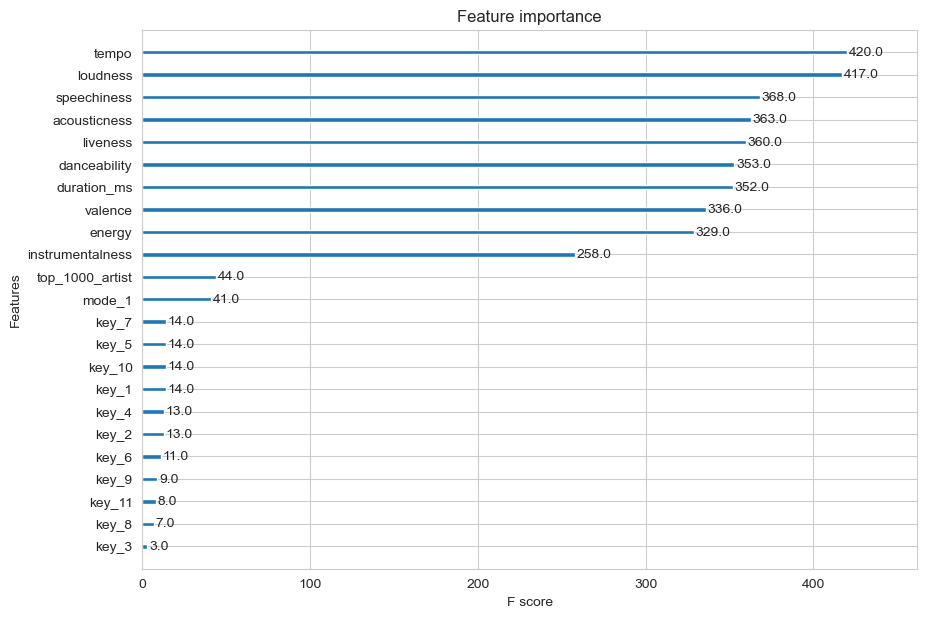

In [183]:
model = XGBClassifier()
model.fit(x_train, y_train)

ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(10, 7)
pyplot.show()

In [184]:
max_depth_range = range(1, 15)
RMSE_scores = []
for depth in max_depth_range:
    treereg = RandomForestRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, x, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

NameError: name 'RandomForestRegressor' is not defined

In [105]:
x_ros, y_ros = RandomOverSampler().fit_resample(x, y_knn)
y_ros.value_counts()

NameError: name 'RandomOverSampler' is not defined

In [106]:
y = songs_char_pure["popularity"]
x_data = songs_char_pure.drop(['popularity', 'top_1000_artist'], axis = 1)

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)
y = y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (21264, 22)
x_test:  (7088, 22)
y_train:  (21264,)
y_test:  (7088,)


/Users/allenwang/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

/Users/allenwang/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'



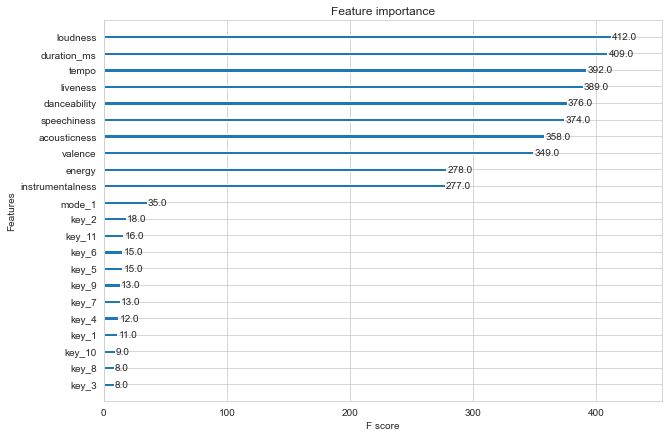

In [107]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

model = XGBClassifier()
model.fit(x_train, y_train)

ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(10, 7)
pyplot.show()

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[03:19:21] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 73.32%


From the image, the 'top_1000_artist', mode and all the keys are not important for prediction. So we only choose the important variables to do the prediction.

In [ ]:
songs_char_pure

danceability  energy  loudness  speechiness  acousticness  \
0             0.748   0.916    -2.634       0.0583      0.102000   
1             0.726   0.815    -4.969       0.0373      0.072400   
2             0.675   0.931    -3.432       0.0742      0.079400   
3             0.718   0.930    -3.778       0.1020      0.028700   
4             0.650   0.833    -4.672       0.0359      0.080300   
...             ...     ...       ...          ...           ...   
32828         0.428   0.922    -1.814       0.0936      0.076600   
32829         0.522   0.786    -4.462       0.0420      0.001710   
32830         0.529   0.821    -4.899       0.0481      0.108000   
32831         0.626   0.888    -3.361       0.1090      0.007920   
32832         0.603   0.884    -4.571       0.0385      0.000133   

       instrumentalness  liveness  valence    tempo  duration_ms  ...  key_11  \
0              0.000000    0.0653   0.5180  122.036     194754.0  ...       0   
1              0.004210    0.3570   0.6930   99.972     162600.0  ...       1   
2              0.000023    0.1100   0.6130  124.008     176616.0  ...       0   
3              0.000009    0.2040   0.2770  121.956     169093.0  ...       0   
4              0.000000    0.0833   0.7250  123.976     189052.0  ...       0   
...                 ...       ...      ...      ...          ...  ...     ...   
32828          0.000000    0.0668   0.2100  128.170     204375.0  ...       0   
32829          0.004270    0.3750   0.4000  128.041     353120.0  ...       0   
32830          0.000001    0.1500   0.4360  127.989     210112.0  ...       0   
32831          0.127000    0.3430   0.3080  128.008     367432.0  ...       0   
32832          0.341000    0.7420   0.0894  127.984     337500.0  ...       0   

       key_2  key_3  key_4  key_5  key_6  key_7  key_8  key_9  mode_1  
0          0      0      0      0      1      0      0      0       1  
1          0      0      0      0      0      0      0      0       1  
2          0      0      0      0      0      0      0      0       0  
3          0      0      0      0      0      1      0      0       1  
4          0      0      0      0      0      0      0      0       1  
...      ...    ...    ...    ...    ...    ...    ...    ...     ...  
32828      1      0      0      0      0      0      0      0       1  
32829      0      0      0      0      0      0      0      0       1  
32830      0      0      0      0      1      0      0      0       0  
32831      1      0      0      0      0      0      0      0       1  
32832      0      0      0      1      0      0      0      0       0  

[28352 rows x 24 columns]

In [ ]:
songs_char_pure_important = songs_char_pure.drop(columns=['top_1000_artist', 'mode_1', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11'])
songs_char_pure_important

danceability  energy  loudness  speechiness  acousticness  \
0             0.748   0.916    -2.634       0.0583      0.102000   
1             0.726   0.815    -4.969       0.0373      0.072400   
2             0.675   0.931    -3.432       0.0742      0.079400   
3             0.718   0.930    -3.778       0.1020      0.028700   
4             0.650   0.833    -4.672       0.0359      0.080300   
...             ...     ...       ...          ...           ...   
32828         0.428   0.922    -1.814       0.0936      0.076600   
32829         0.522   0.786    -4.462       0.0420      0.001710   
32830         0.529   0.821    -4.899       0.0481      0.108000   
32831         0.626   0.888    -3.361       0.1090      0.007920   
32832         0.603   0.884    -4.571       0.0385      0.000133   

       instrumentalness  liveness  valence    tempo  duration_ms  popularity  
0              0.000000    0.0653   0.5180  122.036     194754.0         1.0  
1              0.004210    0.3570   0.6930   99.972     162600.0         1.0  
2              0.000023    0.1100   0.6130  124.008     176616.0         1.0  
3              0.000009    0.2040   0.2770  121.956     169093.0         1.0  
4              0.000000    0.0833   0.7250  123.976     189052.0         1.0  
...                 ...       ...      ...      ...          ...         ...  
32828          0.000000    0.0668   0.2100  128.170     204375.0         0.0  
32829          0.004270    0.3750   0.4000  128.041     353120.0         0.0  
32830          0.000001    0.1500   0.4360  127.989     210112.0         0.0  
32831          0.127000    0.3430   0.3080  128.008     367432.0         0.0  
32832          0.341000    0.7420   0.0894  127.984     337500.0         0.0  

[28352 rows x 11 columns]

In [ ]:
songs_char_pure_important_0 = songs_char_pure.drop(columns=['mode_1', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11'])
songs_char_pure_important_0 = songs_char_pure_important_0[songs_char_pure_important_0['top_1000_artist'] == 0]
songs_char_pure_important_0 = songs_char_pure_important_0.drop(columns=['top_1000_artist'])
songs_char_pure_important_0

danceability  energy  loudness  speechiness  acousticness  \
16            0.694   0.901    -4.322       0.0948      0.070200   
23            0.732   0.850    -5.999       0.0444      0.114000   
29            0.679   0.909    -2.929       0.1050      0.033400   
31            0.702   0.814    -7.510       0.0841      0.107000   
39            0.728   0.815    -2.878       0.0460      0.002230   
...             ...     ...       ...          ...           ...   
32828         0.428   0.922    -1.814       0.0936      0.076600   
32829         0.522   0.786    -4.462       0.0420      0.001710   
32830         0.529   0.821    -4.899       0.0481      0.108000   
32831         0.626   0.888    -3.361       0.1090      0.007920   
32832         0.603   0.884    -4.571       0.0385      0.000133   

       instrumentalness  liveness  valence    tempo  duration_ms  popularity  
16             0.000000    0.4270   0.3680  118.051     173548.0         1.0  
23             0.000002    0.0388   0.3720  124.024     193548.0         1.0  
29             0.000000    0.2690   0.8190  119.885     155080.0         0.0  
31             0.000030    0.3740   0.5030  121.993     172000.0         0.0  
39             0.000317    0.1010   0.6810  124.019     218015.0         0.0  
...                 ...       ...      ...      ...          ...         ...  
32828          0.000000    0.0668   0.2100  128.170     204375.0         0.0  
32829          0.004270    0.3750   0.4000  128.041     353120.0         0.0  
32830          0.000001    0.1500   0.4360  127.989     210112.0         0.0  
32831          0.127000    0.3430   0.3080  128.008     367432.0         0.0  
32832          0.341000    0.7420   0.0894  127.984     337500.0         0.0  

[19899 rows x 11 columns]

In [ ]:
x_data

danceability  energy  loudness  speechiness  acousticness  \
16            0.694   0.901    -4.322       0.0948      0.070200   
23            0.732   0.850    -5.999       0.0444      0.114000   
29            0.679   0.909    -2.929       0.1050      0.033400   
31            0.702   0.814    -7.510       0.0841      0.107000   
39            0.728   0.815    -2.878       0.0460      0.002230   
...             ...     ...       ...          ...           ...   
32828         0.428   0.922    -1.814       0.0936      0.076600   
32829         0.522   0.786    -4.462       0.0420      0.001710   
32830         0.529   0.821    -4.899       0.0481      0.108000   
32831         0.626   0.888    -3.361       0.1090      0.007920   
32832         0.603   0.884    -4.571       0.0385      0.000133   

       instrumentalness  liveness  valence    tempo  duration_ms  \
16             0.000000    0.4270   0.3680  118.051     173548.0   
23             0.000002    0.0388   0.3720  124.024     193548.0   
29             0.000000    0.2690   0.8190  119.885     155080.0   
31             0.000030    0.3740   0.5030  121.993     172000.0   
39             0.000317    0.1010   0.6810  124.019     218015.0   
...                 ...       ...      ...      ...          ...   
32828          0.000000    0.0668   0.2100  128.170     204375.0   
32829          0.004270    0.3750   0.4000  128.041     353120.0   
32830          0.000001    0.1500   0.4360  127.989     210112.0   
32831          0.127000    0.3430   0.3080  128.008     367432.0   
32832          0.341000    0.7420   0.0894  127.984     337500.0   

      popularity_ceta  
16             medium  
23                low  
29               high  
31             medium  
39             medium  
...               ...  
32828          medium  
32829            high  
32830            high  
32831            high  
32832            high  

[19899 rows x 11 columns]

In [ ]:
songs_char_pure_important_0

danceability  energy  loudness  speechiness  acousticness  \
16            0.694   0.901    -4.322       0.0948      0.070200   
23            0.732   0.850    -5.999       0.0444      0.114000   
29            0.679   0.909    -2.929       0.1050      0.033400   
31            0.702   0.814    -7.510       0.0841      0.107000   
39            0.728   0.815    -2.878       0.0460      0.002230   
...             ...     ...       ...          ...           ...   
32828         0.428   0.922    -1.814       0.0936      0.076600   
32829         0.522   0.786    -4.462       0.0420      0.001710   
32830         0.529   0.821    -4.899       0.0481      0.108000   
32831         0.626   0.888    -3.361       0.1090      0.007920   
32832         0.603   0.884    -4.571       0.0385      0.000133   

       instrumentalness  liveness  valence    tempo  duration_ms  popularity  
16             0.000000    0.4270   0.3680  118.051     173548.0         1.0  
23             0.000002    0.0388   0.3720  124.024     193548.0         1.0  
29             0.000000    0.2690   0.8190  119.885     155080.0         0.0  
31             0.000030    0.3740   0.5030  121.993     172000.0         0.0  
39             0.000317    0.1010   0.6810  124.019     218015.0         0.0  
...                 ...       ...      ...      ...          ...         ...  
32828          0.000000    0.0668   0.2100  128.170     204375.0         0.0  
32829          0.004270    0.3750   0.4000  128.041     353120.0         0.0  
32830          0.000001    0.1500   0.4360  127.989     210112.0         0.0  
32831          0.127000    0.3430   0.3080  128.008     367432.0         0.0  
32832          0.341000    0.7420   0.0894  127.984     337500.0         0.0  

[19899 rows x 11 columns]

In [ ]:
y = songs_char_pure_important_0["popularity"]
x_data = songs_char_pure_important_0.drop(['popularity'], axis = 1)

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)
y = y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)
len(y)

/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


19899

Text(0, 0.5, 'RMSE (lower is better)')

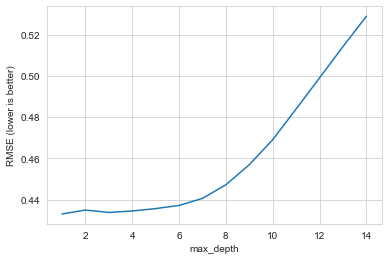

In [125]:
max_depth_range = range(1, 15)
RMSE_scores = []
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, x, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

Text(0, 0.5, 'RMSE (lower is better)')

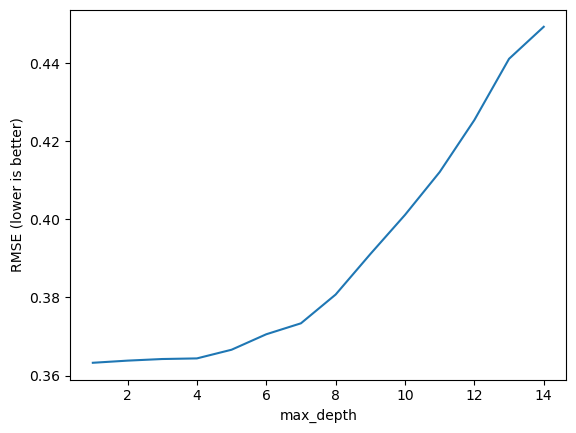

In [ ]:
max_depth_range = range(1, 15)
RMSE_scores = []

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, x, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

Text(0, 0.5, 'RMSE (lower is better)')

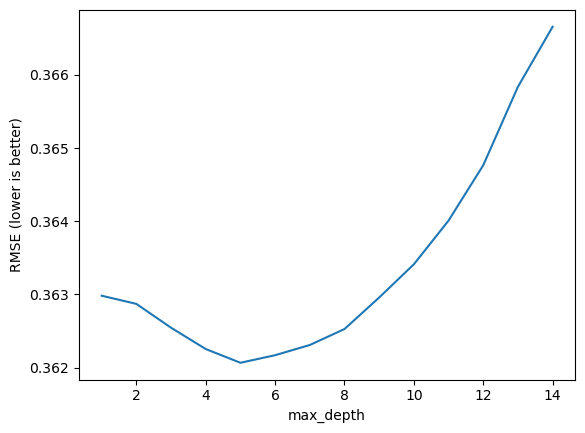

In [ ]:
max_depth_range = range(1, 15)
RMSE_scores = []

for depth in max_depth_range:
    treereg = RandomForestRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, x, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [ ]:
len(x)

3176

In [ ]:
songs_char_pure_important_0['popularity_ceta'] = pd.cut(data['track_popularity'], bins=3, labels=['high', 'medium', 'low'], right=True)
y_knn = songs_char_pure_important_0.popularity_ceta
y_knn.value_counts()

medium    10760
high       8116
low        1023
Name: popularity_ceta, dtype: int64

In [ ]:
x_ros, y_ros = RandomOverSampler().fit_resample(x, y_knn)
y_ros.value_counts()

high      10760
medium    10760
low       10760
Name: popularity_ceta, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.25)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred_class = knn.predict(x_test)
print(accuracy_score(y_test, y_pred_class))

0.7220570012391574


In [ ]:
for i in range(1, 22):
    KNN_acc(x_train, y_train, x_test, y_test, i)

K = 1
Accuracy score =
0.7220570012391574
K = 2
Accuracy score =
0.685006195786865
K = 3
Accuracy score =
0.6776951672862453
K = 4
Accuracy score =
0.6551425030978935
K = 5
Accuracy score =
0.6427509293680297
K = 6
Accuracy score =
0.6323420074349443
K = 7
Accuracy score =
0.6231722428748451
K = 8
Accuracy score =
0.6157372986369269
K = 9
Accuracy score =
0.6037174721189591
K = 10
Accuracy score =
0.5930607187112763
K = 11
Accuracy score =
0.5796778190830235
K = 12
Accuracy score =
0.5707558859975217
K = 13
Accuracy score =
0.5613382899628253
K = 14
Accuracy score =
0.5522924411400247
K = 15
Accuracy score =
0.5463444857496902
K = 16
Accuracy score =
0.5364312267657992
K = 17
Accuracy score =
0.5270136307311029
K = 18
Accuracy score =
0.5231722428748451
K = 19
Accuracy score =
0.5199504337050805
K = 20
Accuracy score =
0.5153655514250309
K = 21
Accuracy score =
0.5163568773234201


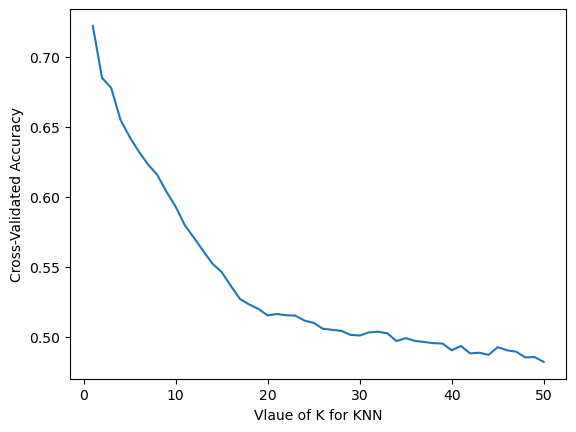

In [ ]:
k_range = range(1, 51)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    score = knn.score(x_test, y_test)
    k_scores.append(score)

plt.plot(k_range, k_scores)
plt.xlabel('Vlaue of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
metrix = confusion_matrix(y_test, y_pred_class)
print('TP - True Negative {}'.format(metrix[0,0]))
print('FP - Flase Positive {}'.format(metrix[0,1]))
print('FN - False Negative {}'.format(metrix[1,0]))
print('TP - True Positive {}'.format(metrix[1,1]))
print('Accuracy Score: {}'.format(np.divide(np.sum([metrix[0,0], metrix[1,1], metrix[2,2]]), np.sum(metrix)))) 
print('Misclassification Rate: {}'.format(np.divide(np.sum([metrix[1,0], metrix[0,1], metrix[0,2], metrix[2,0], metrix[1,2], metrix[2,1]]), np.sum(metrix))))

TP - True Negative 1716
FP - Flase Positive 109
FN - False Negative 14
TP - True Positive 2655
Accuracy Score: 0.7220570012391574
Misclassification Rate: 0.2779429987608426


## Decision tree

In [ ]:
y = songs_char_pure_important["popularity"]
x_data = songs_char_pure_important.drop(['popularity'], axis = 1)

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)
y = y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)

/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Text(0, 0.5, 'RMSE (lower is better)')

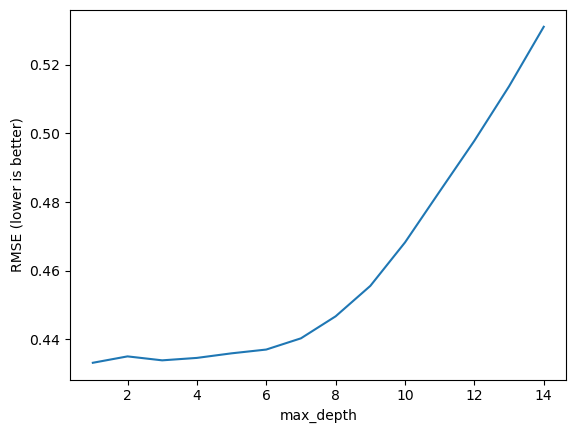

In [ ]:
from sklearn.tree import DecisionTreeRegressor
max_depth_range = range(1, 15)
RMSE_scores = []
from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, x, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

## Random forest

Text(0, 0.5, 'RMSE (lower is better)')

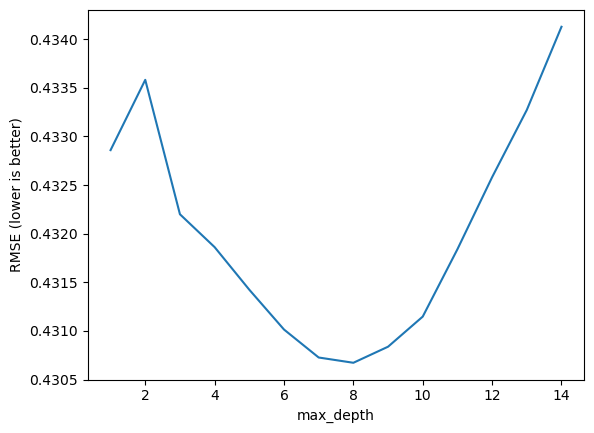

In [ ]:
max_depth_range = range(1, 15)
RMSE_scores = []

for depth in max_depth_range:
    treereg = RandomForestRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, x, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

## KNN classifier

In [ ]:
pd.cut(data['track_popularity'], bins=3, labels=['high', 'medium', 'low']).value_counts()

medium    14250
high      10448
low        3654
Name: track_popularity, dtype: int64

In [ ]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
songs_char_and_pop_ceta = songs_char_pure.copy()
songs_char_and_pop_ceta = songs_char_and_pop_ceta.drop(columns=['top_1000_artist', 'mode_1', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11'])
songs_char_and_pop_ceta['popularity_ceta'] = pd.cut(data['track_popularity'], bins=3, labels=['high', 'medium', 'low'], right=True)
y_knn = songs_char_and_pop_ceta.popularity_ceta
y_knn.value_counts()

medium    14250
high      10448
low        3654
Name: popularity_ceta, dtype: int64

Since the  'popularity' is dummy variable, which the '1' means the song is popular and '0' means it's not. The plot shows that even the lowest point, the RMSE is greater than 0.43, which is not acceptable.

In [ ]:
x_ros, y_ros = RandomOverSampler().fit_resample(x, y_knn)
y_ros.value_counts()

high      14250
medium    14250
low       14250
Name: popularity_ceta, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.25)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred_class = knn.predict(x_test)
print(accuracy_score(y_test, y_pred_class))

0.6824476047904192


In [ ]:
def KNN_acc(x_train, y_train, x_test, y_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_class = knn.predict(x_test)
    print(f'K = {k}')
    print('Accuracy score =')
    print(accuracy_score(y_test, y_pred_class))



In [ ]:
for i in range(1, 22):
    KNN_acc(x_train, y_train, x_test, y_test, i)

K = 1
Accuracy score =
0.6824476047904192
K = 2
Accuracy score =
0.6237836826347305
K = 3
Accuracy score =
0.5959019461077845
K = 4
Accuracy score =
0.5668038922155688
K = 5
Accuracy score =
0.5444423652694611
K = 6
Accuracy score =
0.5295658682634731
K = 7
Accuracy score =
0.5126309880239521
K = 8
Accuracy score =
0.5043974550898204
K = 9
Accuracy score =
0.49550898203592814
K = 10
Accuracy score =
0.49298278443113774
K = 11
Accuracy score =
0.48867889221556887
K = 12
Accuracy score =
0.4881175149700599
K = 13
Accuracy score =
0.48362649700598803
K = 14
Accuracy score =
0.47997754491017963
K = 15
Accuracy score =
0.4745508982035928
K = 16
Accuracy score =
0.47155688622754494
K = 17
Accuracy score =
0.4719311377245509
K = 18
Accuracy score =
0.4746444610778443
K = 19
Accuracy score =
0.46996631736526945
K = 20
Accuracy score =
0.47015344311377244
K = 21
Accuracy score =
0.46341691616766467


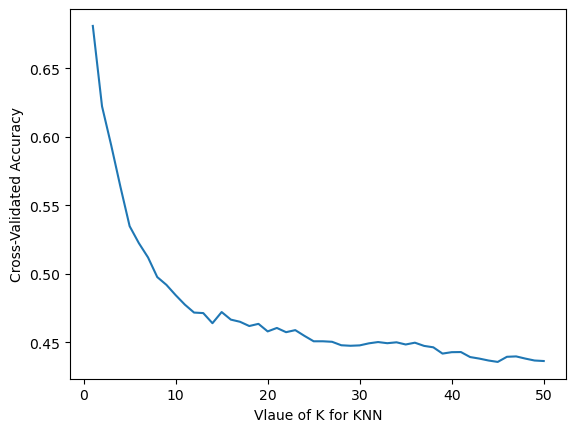

In [ ]:
k_range = range(1, 51)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    score = knn.score(x_test, y_test)
    k_scores.append(score)

plt.plot(k_range, k_scores)
plt.xlabel('Vlaue of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
metrix = confusion_matrix(y_test, y_pred_class)
print('TP - True Negative {}'.format(metrix[0,0]))
print('FP - Flase Positive {}'.format(metrix[0,1]))
print('FN - False Negative {}'.format(metrix[1,0]))
print('TP - True Positive {}'.format(metrix[1,1]))
print('Accuracy Score: {}'.format(np.divide(np.sum([metrix[0,0], metrix[1,1], metrix[2,2]]), np.sum(metrix)))) 
print('Misclassification Rate: {}'.format(np.divide(np.sum([metrix[1,0], metrix[0,1], metrix[0,2], metrix[2,0], metrix[1,2], metrix[2,1]]), np.sum(metrix))))

TP - True Negative 2167
FP - Flase Positive 356
FN - False Negative 86
TP - True Positive 3413
Accuracy Score: 0.6810441616766467
Misclassification Rate: 0.3189558383233533


In [ ]:
x_test

danceability    energy  loudness  speechiness  acousticness  \
13696      0.641913  0.780962  0.864468     0.042593      0.000375   
33173      0.680570  0.796964  0.854263     0.067974      0.260563   
1956       0.857579  0.796964  0.876957     0.045643      0.203219   
33807      0.626653  0.988998  0.937703     0.052614      0.167002   
23033      0.754832  0.638937  0.887224     0.033551      0.013280   
...             ...       ...       ...          ...           ...   
13267      0.856562  0.681944  0.738135     0.039216      0.077264   
14751      0.324517  0.711950  0.769147     0.058279      0.243461   
39828      0.577823  0.419898  0.739245     0.300654      0.539235   
18444      0.793489  0.679944  0.845860     0.033224      0.141851   
2002       0.536114  0.833971  0.857385     0.048693      0.001076   

       instrumentalness  liveness   valence     tempo  duration_ms  
13696          0.000002  0.111446  0.704339  0.376011     0.336233  
33173          0.000000  0.199799  0.557013  0.500606     0.354106  
1956           0.000118  0.082530  0.618567  0.459293     0.328526  
33807          0.000000  0.172691  0.910192  0.396909     0.387614  
23033          0.000005  0.123494  0.660949  0.500794     0.495280  
...                 ...       ...       ...       ...          ...  
13267          0.003692  0.063153  0.973764  0.536168     0.526473  
14751          0.000416  0.295181  0.780020  0.326236     0.511317  
39828          0.124748  0.101406  0.457114  0.333654     0.801100  
18444          0.000012  0.138554  0.599395  0.492925     0.343629  
2002           0.000103  0.099699  0.425832  0.459677     0.378220  

[10688 rows x 10 columns]

In [ ]:
x_test_pre = x_test.copy()
x_test_pre['popularity_ceta_pre'] = knn.predict(x_test)
x_test_pre

danceability    energy  loudness  speechiness  acousticness  \
13696      0.641913  0.780962  0.864468     0.042593      0.000375   
33173      0.680570  0.796964  0.854263     0.067974      0.260563   
1956       0.857579  0.796964  0.876957     0.045643      0.203219   
33807      0.626653  0.988998  0.937703     0.052614      0.167002   
23033      0.754832  0.638937  0.887224     0.033551      0.013280   
...             ...       ...       ...          ...           ...   
13267      0.856562  0.681944  0.738135     0.039216      0.077264   
14751      0.324517  0.711950  0.769147     0.058279      0.243461   
39828      0.577823  0.419898  0.739245     0.300654      0.539235   
18444      0.793489  0.679944  0.845860     0.033224      0.141851   
2002       0.536114  0.833971  0.857385     0.048693      0.001076   

       instrumentalness  liveness   valence     tempo  duration_ms  \
13696          0.000002  0.111446  0.704339  0.376011     0.336233   
33173          0.000000  0.199799  0.557013  0.500606     0.354106   
1956           0.000118  0.082530  0.618567  0.459293     0.328526   
33807          0.000000  0.172691  0.910192  0.396909     0.387614   
23033          0.000005  0.123494  0.660949  0.500794     0.495280   
...                 ...       ...       ...       ...          ...   
13267          0.003692  0.063153  0.973764  0.536168     0.526473   
14751          0.000416  0.295181  0.780020  0.326236     0.511317   
39828          0.124748  0.101406  0.457114  0.333654     0.801100   
18444          0.000012  0.138554  0.599395  0.492925     0.343629   
2002           0.000103  0.099699  0.425832  0.459677     0.378220   

      popularity_ceta_pre  
13696              medium  
33173                 low  
1956                  low  
33807                high  
23033              medium  
...                   ...  
13267                 low  
14751                 low  
39828                 low  
18444                 low  
2002                  low  

[10688 rows x 11 columns]

### POP

In [ ]:
songs_char_pop = data.drop(columns=['track_name', 'track_artist', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_subgenre'])
songs_char_pop = songs_char_pop[songs_char_pop['playlist_genre'] == 'pop']
data['playlist_genre'].value_counts()

rap      5398
pop      5132
edm      4877
r&b      4504
rock     4305
latin    4136
Name: playlist_genre, dtype: int64

In [ ]:
songs_char_pop_pure = songs_char_pop.drop(columns=['track_popularity', 'year'])
songs_char_pop_pure['key'] = songs_char_pop_pure['key'].apply(str)
songs_char_pop_pure['mode'] = songs_char_pop_pure['mode'].apply(str)
songs_char_pop_pure['popularity'] = songs_char_pop_pure['popularity'].apply(float)
songs_char_pop_pure = pd.get_dummies(songs_char_pop_pure, drop_first=True)
songs_char_pop_pure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5132 entries, 0 to 5506
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5132 non-null   float64
 1   energy            5132 non-null   float64
 2   loudness          5132 non-null   float64
 3   speechiness       5132 non-null   float64
 4   acousticness      5132 non-null   float64
 5   instrumentalness  5132 non-null   float64
 6   liveness          5132 non-null   float64
 7   valence           5132 non-null   float64
 8   tempo             5132 non-null   float64
 9   duration_ms       5132 non-null   float64
 10  top_1000_artist   5132 non-null   int64  
 11  popularity        5132 non-null   float64
 12  key_1             5132 non-null   uint8  
 13  key_10            5132 non-null   uint8  
 14  key_11            5132 non-null   uint8  
 15  key_2             5132 non-null   uint8  
 16  key_3             5132 non-null   uint8  


In [ ]:
def change_to_int(column):
    songs_char_pop_pure[column] = songs_char_pop_pure[column].astype(int)

dummies = ['key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode_1']
for i in dummies:
    change_to_int(i)

In [ ]:
y = songs_char_pop_pure["popularity"]
x_data = songs_char_pop_pure.drop(['popularity', 'top_1000_artist'], axis = 1)

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)
y = y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (3849, 22)
x_test:  (1283, 22)
y_train:  (3849,)
y_test:  (1283,)


/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
songs_char_pop_pure_important_0 = songs_char_pop_pure.drop(columns=['mode_1', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11'])
songs_char_pop_pure_important_0 = songs_char_pop_pure_important_0[songs_char_pop_pure_important_0['top_1000_artist'] == 0]
songs_char_pop_pure_important_0 = songs_char_pop_pure_important_0.drop(columns=['top_1000_artist'])

danceability  energy  loudness  speechiness  acousticness  \
16           0.694   0.901    -4.322       0.0948       0.07020   
23           0.732   0.850    -5.999       0.0444       0.11400   
29           0.679   0.909    -2.929       0.1050       0.03340   
31           0.702   0.814    -7.510       0.0841       0.10700   
39           0.728   0.815    -2.878       0.0460       0.00223   
...            ...     ...       ...          ...           ...   
5500         0.682   0.790    -4.058       0.0313       0.05330   
5502         0.768   0.814    -4.288       0.0572       0.02890   
5503         0.630   0.889    -3.863       0.0441       0.08830   
5505         0.671   0.388    -8.302       0.0632       0.04100   
5506         0.667   0.783    -5.885       0.0361       0.06060   

      instrumentalness  liveness  valence    tempo  duration_ms  popularity  
16            0.000000    0.4270    0.368  118.051     173548.0         1.0  
23            0.000002    0.0388    0.372  124.024     193548.0         1.0  
29            0.000000    0.2690    0.819  119.885     155080.0         0.0  
31            0.000030    0.3740    0.503  121.993     172000.0         0.0  
39            0.000317    0.1010    0.681  124.019     218015.0         0.0  
...                ...       ...      ...      ...          ...         ...  
5500          0.000004    0.2510    0.222  123.049     176675.0         0.0  
5502          0.000000    0.0654    0.876  124.042     197600.0         0.0  
5503          0.000000    0.1070    0.693  132.033     178053.0         0.0  
5505          0.000302    0.1080    0.634  158.687     173748.0         0.0  
5506          0.000001    0.0418    0.564  117.145     250120.0         0.0  

[3176 rows x 11 columns]

In [ ]:
y = songs_char_pop_pure_important_0["popularity"]
x_data = songs_char_pop_pure_important_0.drop(['popularity'], axis = 1)

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)
y = y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)

/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Text(0, 0.5, 'RMSE (lower is better)')

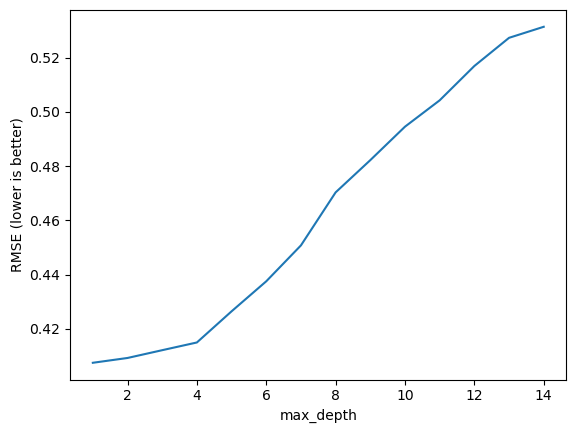

In [ ]:
max_depth_range = range(1, 15)
RMSE_scores = []

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, x, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

Text(0, 0.5, 'RMSE (lower is better)')

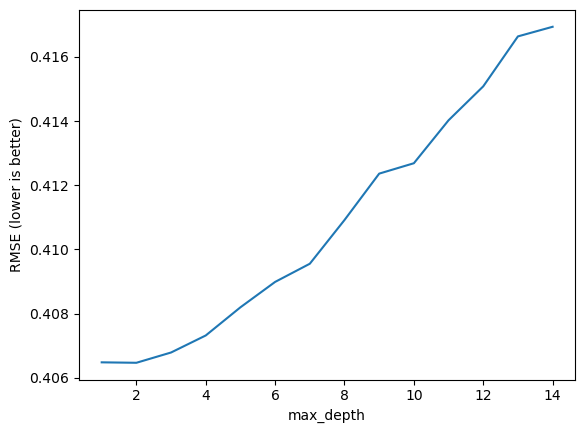

In [ ]:
max_depth_range = range(1, 15)
RMSE_scores = []

for depth in max_depth_range:
    treereg = RandomForestRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, x, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [ ]:
songs_char_pop_and_pop_ceta = songs_char_pop_pure_important_0.copy()
songs_char_pop_and_pop_ceta['popularity_ceta'] = pd.cut(data['track_popularity'], bins=3, labels=['high', 'medium', 'low'], right=True)
y = songs_char_pop_and_pop_ceta.popularity_ceta
x_data = songs_char_pop_pure_important_0.drop(['popularity'], axis = 1)
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
y_knn = songs_char_pop_and_pop_ceta.popularity_ceta
y_knn.value_counts()

/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


medium    1795
high      1129
low        252
Name: popularity_ceta, dtype: int64

In [ ]:
y = songs_char_pop_pure_important_0["popularity"]
x_data = songs_char_pop_pure_important_0.drop(['popularity'], axis = 1)

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)
y = y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)
len(y_knn)

/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


3176

In [ ]:
x_ros, y_ros = RandomOverSampler().fit_resample(x, y_knn)
y_ros.value_counts()

high      1795
medium    1795
low       1795
Name: popularity_ceta, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.25)

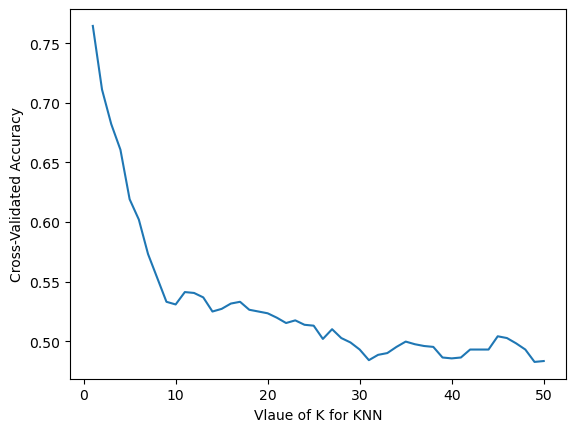

In [ ]:
k_range = range(1, 51)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    score = knn.score(x_test, y_test)
    k_scores.append(score)

plt.plot(k_range, k_scores)
plt.xlabel('Vlaue of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### RAP

In [ ]:
songs_char_rap = data.drop(columns=['track_name', 'track_artist', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_subgenre'])
songs_char_rap = songs_char_rap[songs_char_rap['playlist_genre'] == 'rap']

In [ ]:
songs_char_rap_pure = songs_char_rap.drop(columns=['track_popularity', 'year'])
songs_char_rap_pure['key'] = songs_char_rap_pure['key'].apply(str)
songs_char_rap_pure['mode'] = songs_char_rap_pure['mode'].apply(str)
songs_char_rap_pure['popularity'] = songs_char_rap_pure['popularity'].apply(float)
songs_char_rap_pure = pd.get_dummies(songs_char_rap_pure, drop_first=True)
songs_char_rap_pure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5398 entries, 5507 to 11252
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5398 non-null   float64
 1   energy            5398 non-null   float64
 2   loudness          5398 non-null   float64
 3   speechiness       5398 non-null   float64
 4   acousticness      5398 non-null   float64
 5   instrumentalness  5398 non-null   float64
 6   liveness          5398 non-null   float64
 7   valence           5398 non-null   float64
 8   tempo             5398 non-null   float64
 9   duration_ms       5398 non-null   float64
 10  top_1000_artist   5398 non-null   int64  
 11  popularity        5398 non-null   float64
 12  key_1             5398 non-null   uint8  
 13  key_10            5398 non-null   uint8  
 14  key_11            5398 non-null   uint8  
 15  key_2             5398 non-null   uint8  
 16  key_3             5398 non-null   uint

In [ ]:
songs_char_rap_pure

danceability  energy  loudness  speechiness  acousticness  \
5507          0.676   0.609    -5.831       0.4810        0.0706   
5508          0.896   0.586    -6.687       0.0559        0.1040   
5509          0.699   0.503    -9.922       0.0882        0.3910   
5510          0.881   0.457    -8.191       0.1560        0.0327   
5512          0.823   0.552    -7.570       0.3240        0.0174   
...             ...     ...       ...          ...           ...   
11246         0.810   0.353    -9.931       0.3100        0.5880   
11247         0.886   0.629    -4.404       0.3060        0.0510   
11248         0.900   0.653    -6.962       0.2890        0.0945   
11251         0.749   0.809    -7.649       0.0504        0.0484   
11252         0.711   0.663    -5.805       0.1420        0.0300   

       instrumentalness  liveness  valence    tempo  duration_ms  ...  key_11  \
5507           0.000000    0.1520   0.5080  142.037     237735.0  ...       0   
5508           0.000000    0.7900   0.6420  116.971     196653.0  ...       0   
5509           0.012600    0.0996   0.0546  114.860     220853.0  ...       0   
5510           0.000000    0.2310   0.2960  136.970     198913.0  ...       0   
5512           0.000000    0.1220   0.4180  124.038     205760.0  ...       0   
...                 ...       ...      ...      ...          ...  ...     ...   
11246          0.000000    0.1020   0.0727   88.031     208293.0  ...       0   
11247          0.000008    0.1210   0.4870  158.002     182491.0  ...       0   
11248          0.000000    0.5280   0.3990  112.503     145603.0  ...       0   
11251          0.000000    0.1720   0.3110  147.992     167683.0  ...       1   
11252          0.000000    0.1230   0.2140  121.112     251195.0  ...       1   

       key_2  key_3  key_4  key_5  key_6  key_7  key_8  key_9  mode_1  
5507       1      0      0      0      0      0      0      0       0  
5508       0      0      0      0      0      0      0      0       0  
5509       0      0      0      1      0      0      0      0       0  
5510       0      0      0      0      0      1      0      0       0  
5512       0      0      1      0      0      0      0      0       0  
...      ...    ...    ...    ...    ...    ...    ...    ...     ...  
11246      0      0      0      0      1      0      0      0       0  
11247      0      0      0      0      0      0      0      0       0  
11248      0      0      0      0      0      0      0      0       0  
11251      0      0      0      0      0      0      0      0       1  
11252      0      0      0      0      0      0      0      0       1  

[5398 rows x 24 columns]

In [ ]:
def change_to_int(column):
    songs_char_rap_pure[column] = songs_char_rap_pure[column].astype(int)

dummies = ['key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode_1']
for i in dummies:
    change_to_int(i)

In [ ]:
y = songs_char_rap_pure["popularity"]
x_data = songs_char_rap_pure.drop(['popularity', 'top_1000_artist'], axis = 1)

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)
y = y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (4048, 22)
x_test:  (1350, 22)
y_train:  (4048,)
y_test:  (1350,)


/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
songs_char_rap_pure_important_0 = songs_char_rap_pure.drop(columns=['mode_1', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11'])
songs_char_rap_pure_important_0 = songs_char_rap_pure_important_0[songs_char_rap_pure_important_0['top_1000_artist'] == 0]
songs_char_rap_pure_important_0 = songs_char_rap_pure_important_0.drop(columns=['top_1000_artist'])

In [ ]:
y = songs_char_rap_pure_important_0["popularity"]
x_data = songs_char_rap_pure_important_0.drop(['popularity'], axis = 1)

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)
y = y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)

/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Text(0, 0.5, 'RMSE (lower is better)')

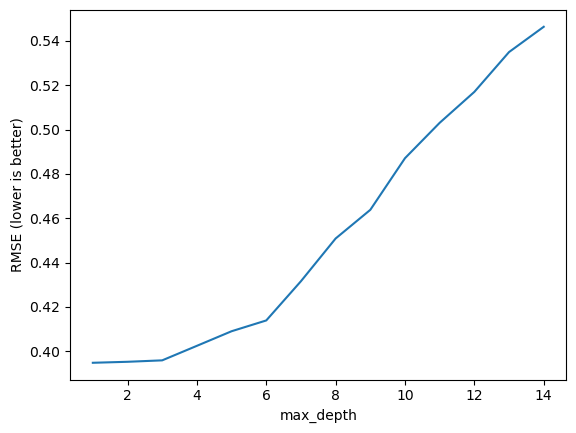

In [ ]:
from sklearn.tree import DecisionTreeRegressor
max_depth_range = range(1, 15)
RMSE_scores = []
from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, x, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

Text(0, 0.5, 'RMSE (lower is better)')

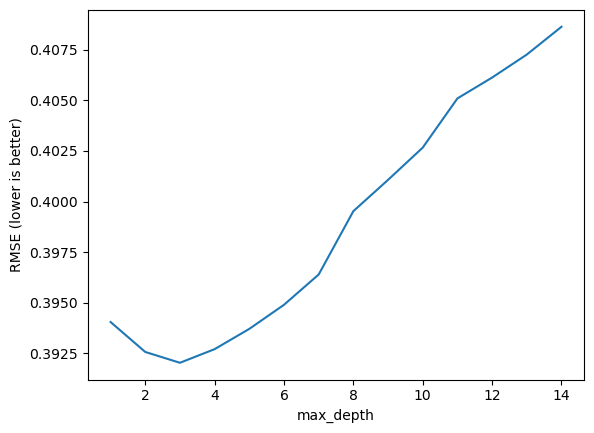

In [ ]:
max_depth_range = range(1, 15)
RMSE_scores = []

for depth in max_depth_range:
    treereg = RandomForestRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, x, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [ ]:
songs_char_rap_and_pop_ceta = songs_char_rap_pure_important_0.copy()
songs_char_rap_and_pop_ceta['popularity_ceta'] = pd.cut(data['track_popularity'], bins=3, labels=['high', 'medium', 'low'], right=True)
y = songs_char_rap_and_pop_ceta.popularity_ceta
x_data = songs_char_rap_pure_important_0.drop(['popularity'], axis = 1)
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
y_knn = songs_char_rap_and_pop_ceta.popularity_ceta
y_knn.value_counts()

/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


medium    2434
high      1115
low        223
Name: popularity_ceta, dtype: int64

In [ ]:
y = songs_char_rap_pure_important_0["popularity"]
x_data = songs_char_rap_pure_important_0.drop(['popularity'], axis = 1)

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)
y = y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)
len(y_knn)

/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


3772

In [ ]:
x_ros, y_ros = RandomOverSampler().fit_resample(x, y_knn)
y_ros.value_counts()

high      2434
medium    2434
low       2434
Name: popularity_ceta, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.25)

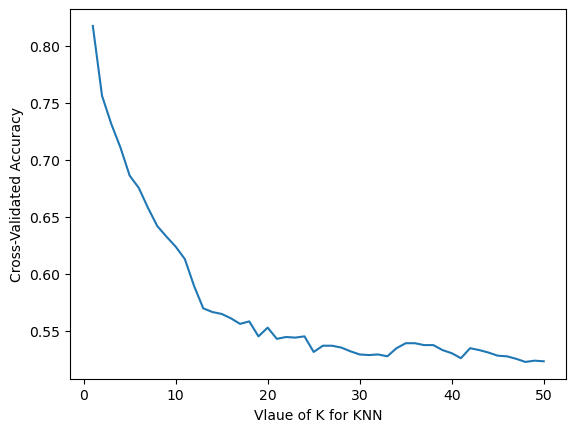

In [ ]:
k_range = range(1, 51)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    score = knn.score(x_test, y_test)
    k_scores.append(score)

plt.plot(k_range, k_scores)
plt.xlabel('Vlaue of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### EDM

In [ ]:
songs_char_edm = data.drop(columns=['track_name', 'track_artist', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_subgenre'])
songs_char_edm = songs_char_edm[songs_char_edm['playlist_genre'] == 'pop']

rap      5398
pop      5132
edm      4877
r&b      4504
rock     4305
latin    4136
Name: playlist_genre, dtype: int64

In [ ]:
songs_char_edm_pure = songs_char_edm.drop(columns=['track_popularity', 'year'])
songs_char_edm_pure['key'] = songs_char_edm_pure['key'].apply(str)
songs_char_edm_pure['mode'] = songs_char_edm_pure['mode'].apply(str)
songs_char_edm_pure['popularity'] = songs_char_edm_pure['popularity'].apply(float)
songs_char_edm_pure = pd.get_dummies(songs_char_edm_pure, drop_first=True)
songs_char_edm_pure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5132 entries, 0 to 5506
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5132 non-null   float64
 1   energy            5132 non-null   float64
 2   loudness          5132 non-null   float64
 3   speechiness       5132 non-null   float64
 4   acousticness      5132 non-null   float64
 5   instrumentalness  5132 non-null   float64
 6   liveness          5132 non-null   float64
 7   valence           5132 non-null   float64
 8   tempo             5132 non-null   float64
 9   duration_ms       5132 non-null   float64
 10  top_1000_artist   5132 non-null   int64  
 11  popularity        5132 non-null   float64
 12  key_1             5132 non-null   uint8  
 13  key_10            5132 non-null   uint8  
 14  key_11            5132 non-null   uint8  
 15  key_2             5132 non-null   uint8  
 16  key_3             5132 non-null   uint8  


In [ ]:
def change_to_int(column):
    songs_char_edm_pure[column] = songs_char_edm_pure[column].astype(int)

dummies = ['key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode_1']
for i in dummies:
    change_to_int(i)

In [ ]:
y = songs_char_edm_pure["popularity"]
x_data = songs_char_edm_pure.drop(['popularity', 'top_1000_artist'], axis = 1)

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)
y = y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (3849, 22)
x_test:  (1283, 22)
y_train:  (3849,)
y_test:  (1283,)


/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
songs_char_edm_pure_important_0 = songs_char_edm_pure.drop(columns=['mode_1', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11'])
songs_char_edm_pure_important_0 = songs_char_edm_pure_important_0[songs_char_edm_pure_important_0['top_1000_artist'] == 0]
songs_char_edm_pure_important_0 = songs_char_edm_pure_important_0.drop(columns=['top_1000_artist'])

In [ ]:
y = songs_char_edm_pure_important_0["popularity"]
x_data = songs_char_edm_pure_important_0.drop(['popularity'], axis = 1)

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)
y = y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)

/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Text(0, 0.5, 'RMSE (lower is better)')

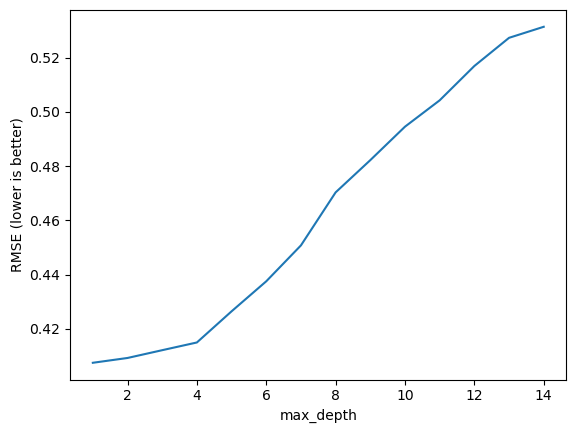

In [ ]:
max_depth_range = range(1, 15)
RMSE_scores = []

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, x, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

Text(0, 0.5, 'RMSE (lower is better)')

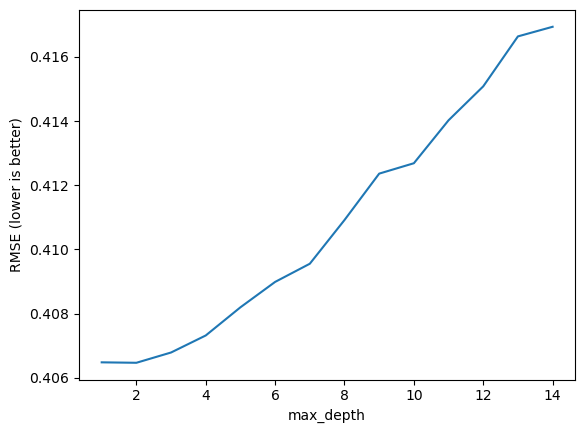

In [ ]:
max_depth_range = range(1, 15)
RMSE_scores = []

for depth in max_depth_range:
    treereg = RandomForestRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, x, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [ ]:
songs_char_pop_and_pop_ceta = songs_char_pop_pure_important_0.copy()
songs_char_pop_and_pop_ceta['popularity_ceta'] = pd.cut(data['track_popularity'], bins=3, labels=['high', 'medium', 'low'], right=True)
y = songs_char_pop_and_pop_ceta.popularity_ceta
x_data = songs_char_pop_pure_important_0.drop(['popularity'], axis = 1)
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
y_knn = songs_char_pop_and_pop_ceta.popularity_ceta
y_knn.value_counts()

/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


medium    1795
high      1129
low        252
Name: popularity_ceta, dtype: int64

In [ ]:
y = songs_char_edm_pure_important_0["popularity"]
x_data = songs_char_edm_pure_important_0.drop(['popularity'], axis = 1)

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)
y = y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)
len(y_knn)

/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/allenwang/opt/anaconda3/envs/general/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


3176

In [ ]:
x_ros, y_ros = RandomOverSampler().fit_resample(x, y_knn)
y_ros.value_counts()

high      1795
medium    1795
low       1795
Name: popularity_ceta, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.25)

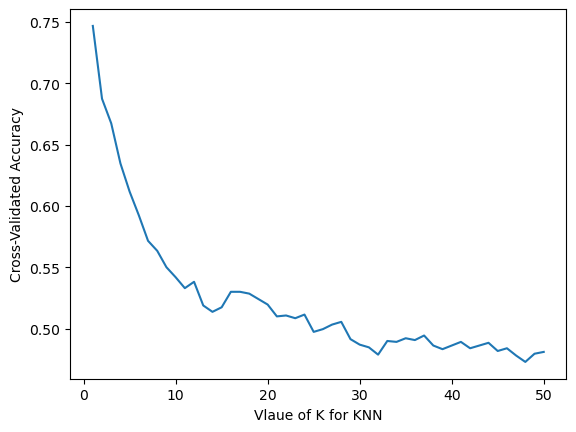

In [ ]:
k_range = range(1, 51)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    score = knn.score(x_test, y_test)
    k_scores.append(score)

plt.plot(k_range, k_scores)
plt.xlabel('Vlaue of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()